### Surprise Housing  wants to know:

      1. Which variables are significant in predicting the price of a house, and

      2. How well those variables describe the price of a house.

#### Also, determine the optimal value of lambda for ridge and lasso regression.

#### Import libraries

In [1]:
# Load libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Read data

In [2]:
#Reading the data
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the dimensions
df.shape[0]

1460

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data cleaning and Manipulation

In [6]:
# Many categarical features has 'NA' as a type of feature, It's read as "NaN" in dataframe. hence converting them into "None" 

df[['Alley','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]=df[['Alley','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].fillna('None')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [8]:
# convertying the numercial data types to Categarical one. 
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
# convertying the numercial data types to Categarical one. 
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [11]:
# Work on null values
df.columns[df.isnull().any()] 

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')

In [12]:
# Work on null values
df[['MasVnrType', 'GarageYrBlt']]=df[['MasVnrType', 'GarageYrBlt']].fillna("None")

In [13]:
# Work on null values
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [14]:
df[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


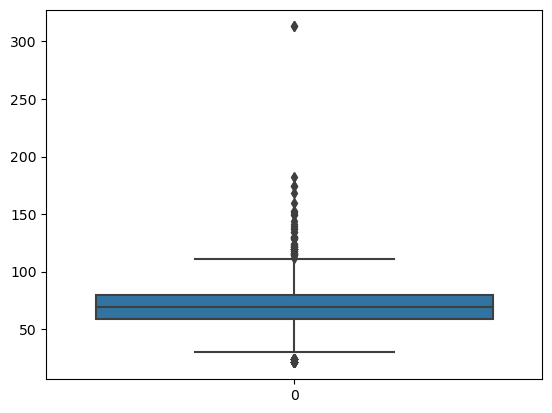

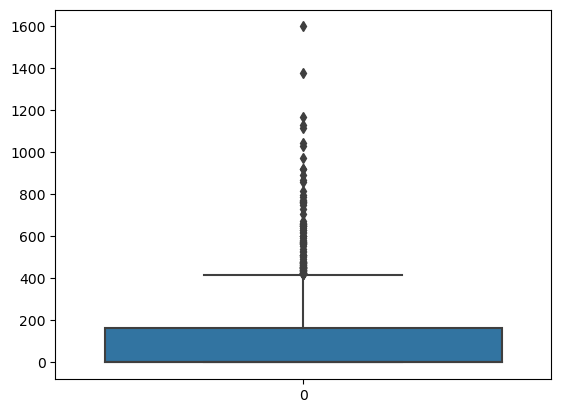

In [15]:
sns.boxplot(df['LotFrontage'] )
plt.show()
sns.boxplot(df['MasVnrArea'] )
plt.show()

In [16]:
# Work on null values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [17]:
df[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1460.000000,1460.000000
mean,69.863699,103.117123
std,22.027677,180.731373
min,21.000000,0.000000
25%,60.000000,0.000000
50%,69.000000,0.000000
75%,79.000000,164.250000
max,313.000000,1600.000000


In [18]:
# Removing ID column as it has no value.
df=df.drop(columns=['Id'])

#### Study about response variable

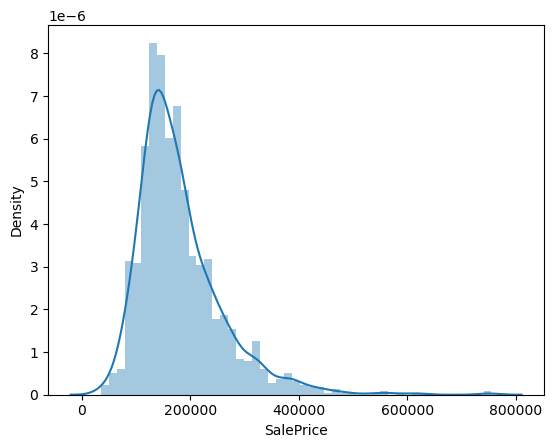

In [19]:
sns.distplot(df['SalePrice']);

In [20]:
df['SalePrice'].skew()

1.8828757597682129

In [21]:
df['SalePrice'].kurt()

6.536281860064529

In [22]:
### Both Skew and Kurtosis are grather than 1, hence "SalePrice" data has to be transformed with log transformation.

In [23]:
df['SalePrice'] = np.log(df['SalePrice'])

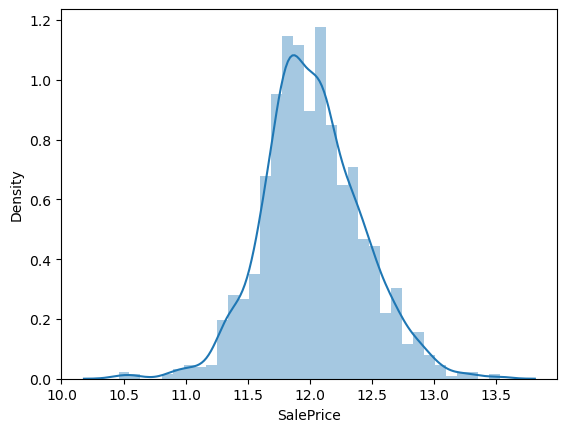

In [24]:
sns.distplot(df['SalePrice']);

In [25]:
df['SalePrice'].skew()

0.12133506220520406

In [26]:
df['SalePrice'].kurt()

0.8095319958036296

### EDA 

##### Grouping numerical and Categarical variables

In [27]:
df_num=df.select_dtypes(include=['int64', 'float64'])
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,12.247694
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,12.109011
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,12.317167
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,11.849398
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,12.429216


In [28]:
# As we are going to apply scaling for "YearBuilt","YrSold" and "YearRemodAdd",  not maniplulating and adding drived features. 

In [29]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,None,None,None,WD,Normal


In [30]:
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,None,None,None,WD,Normal


#### Study of numerical variables

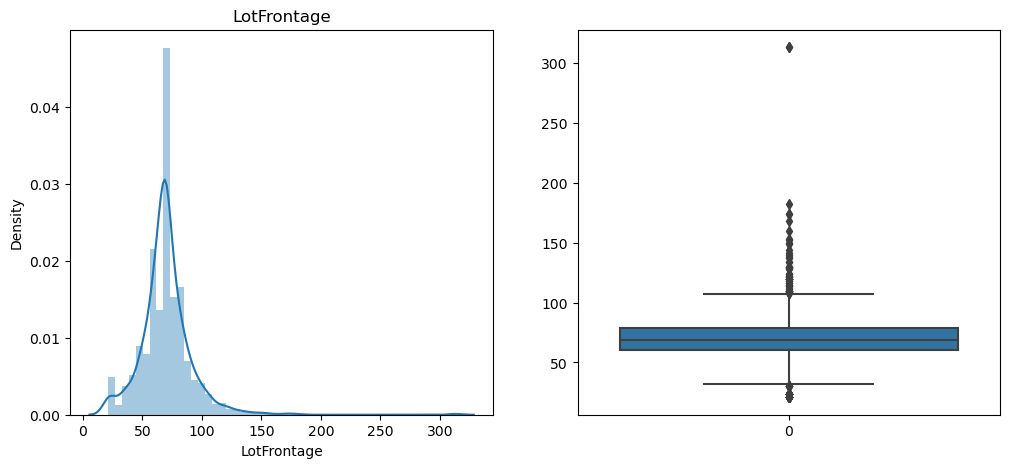

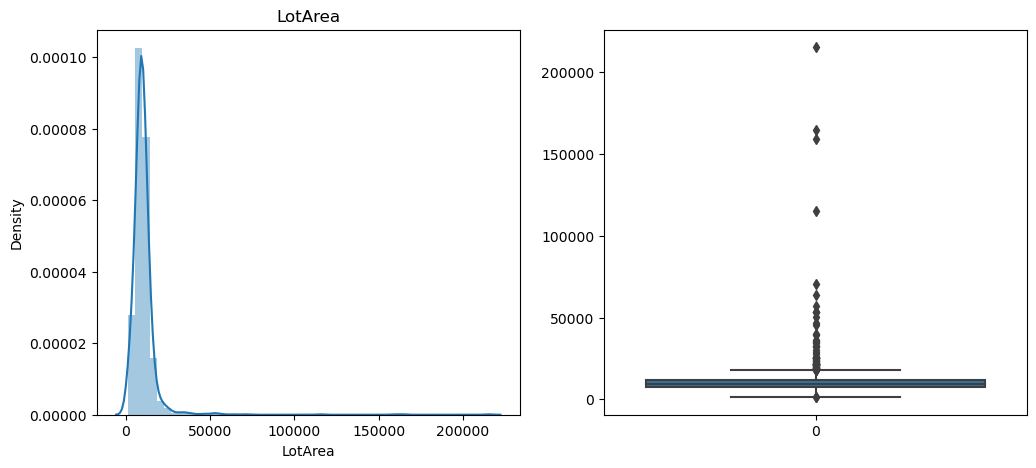

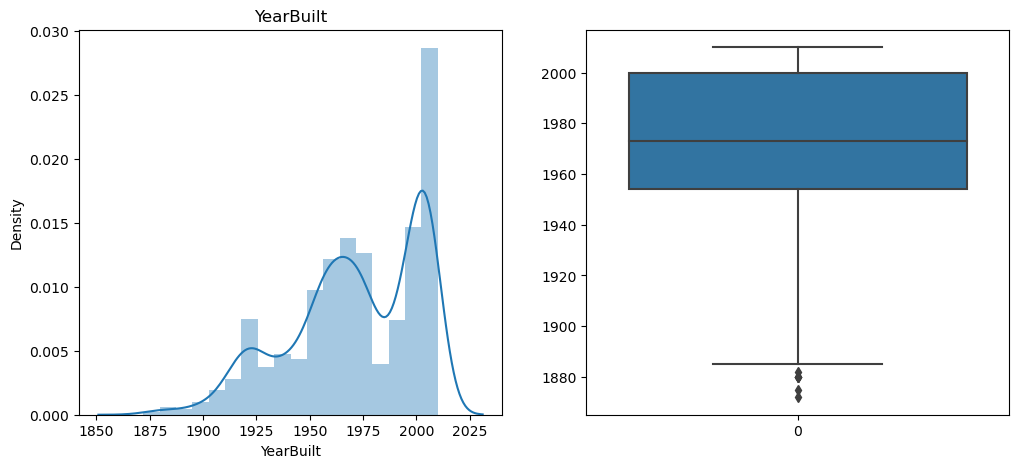

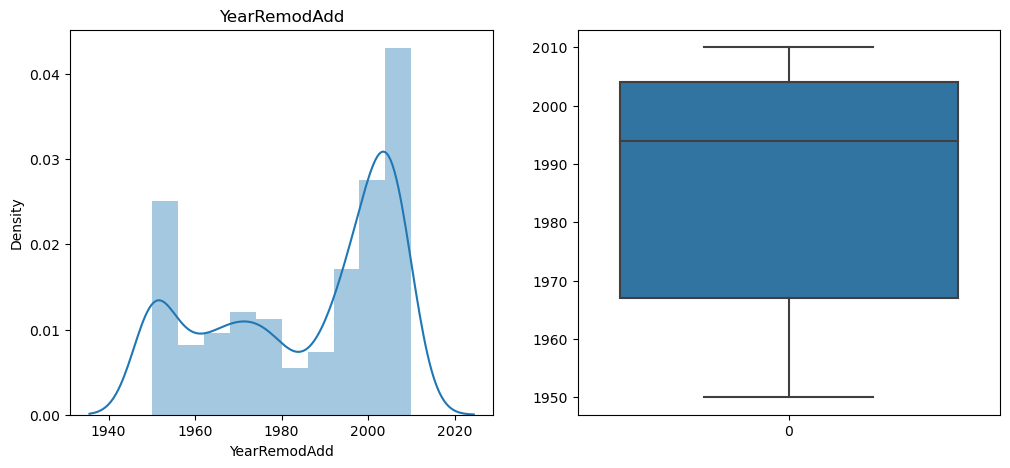

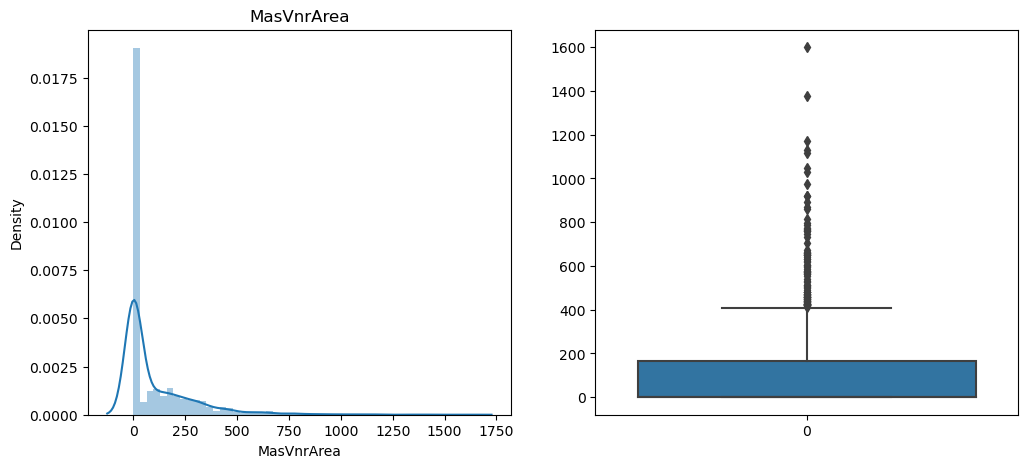

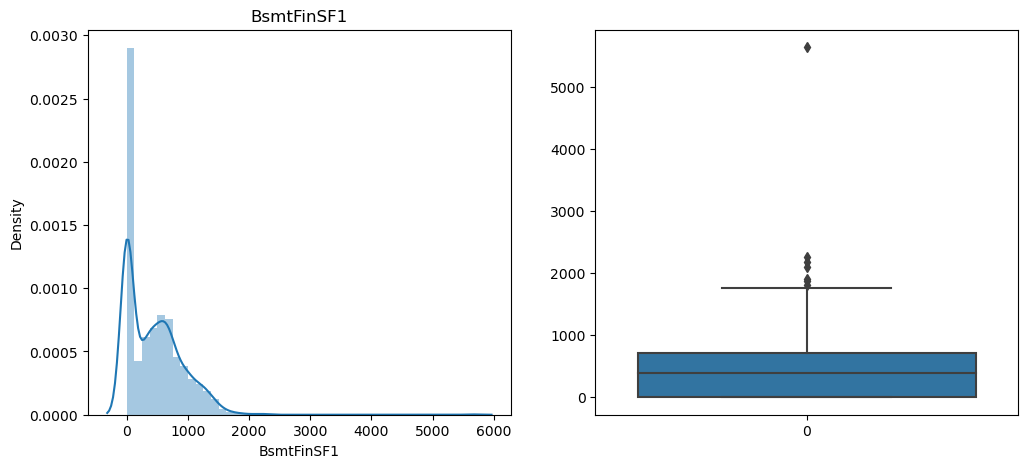

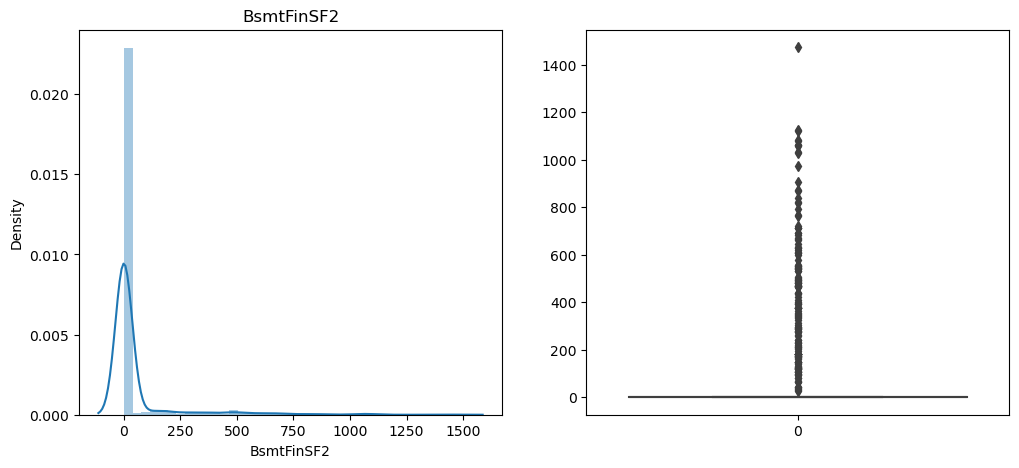

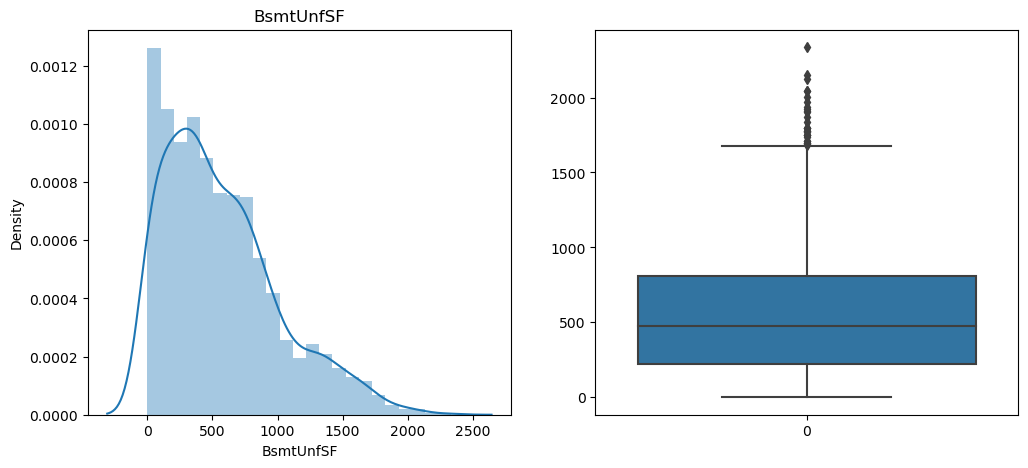

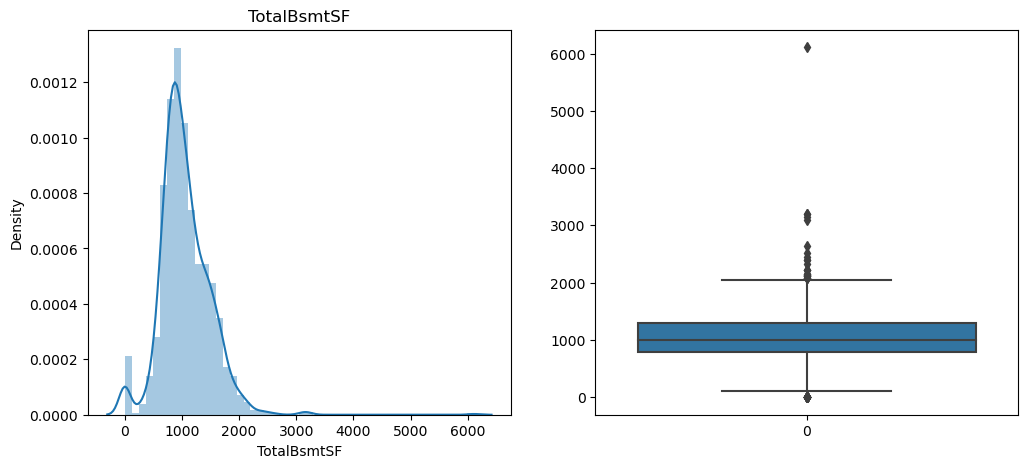

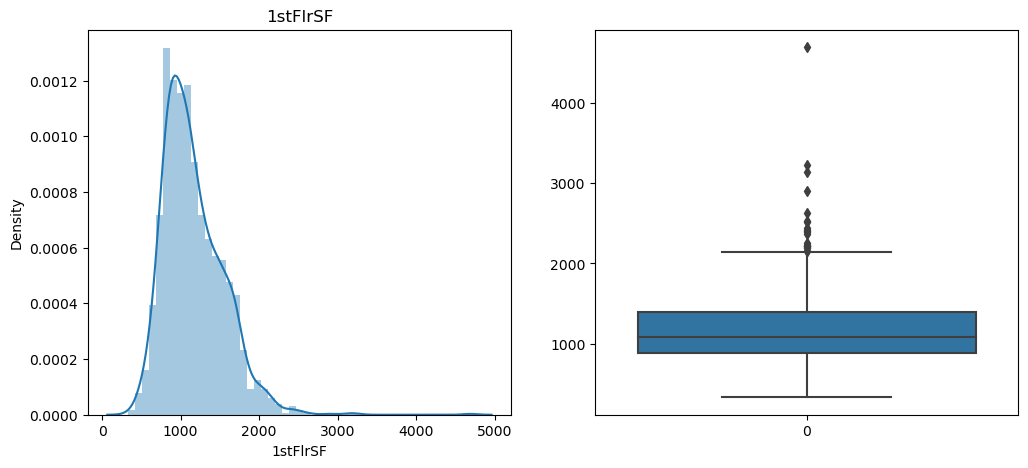

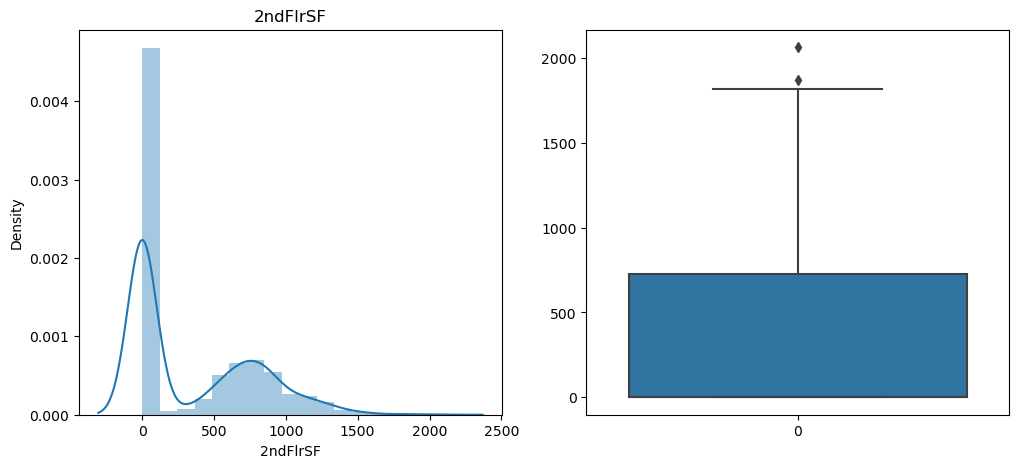

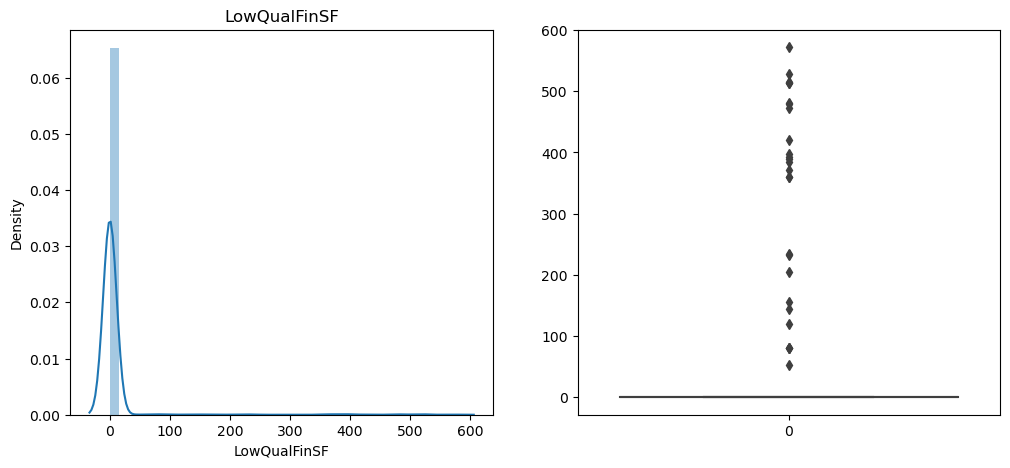

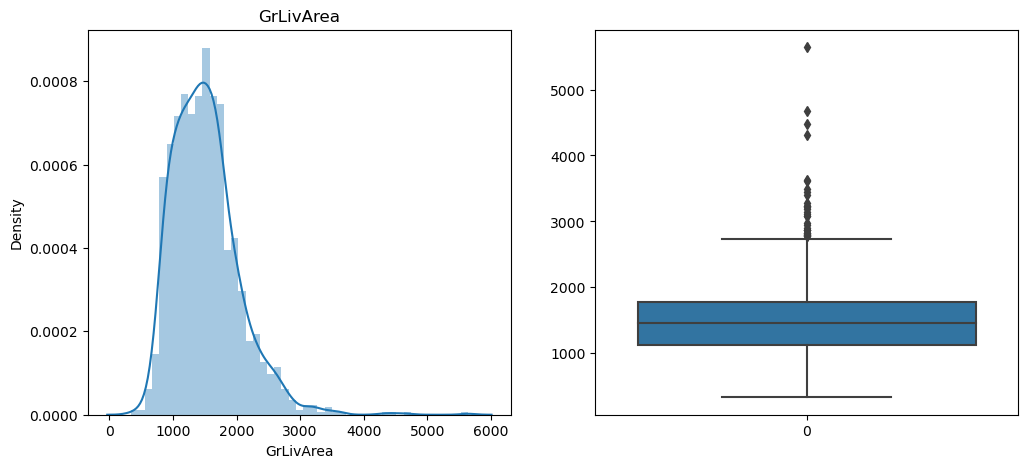

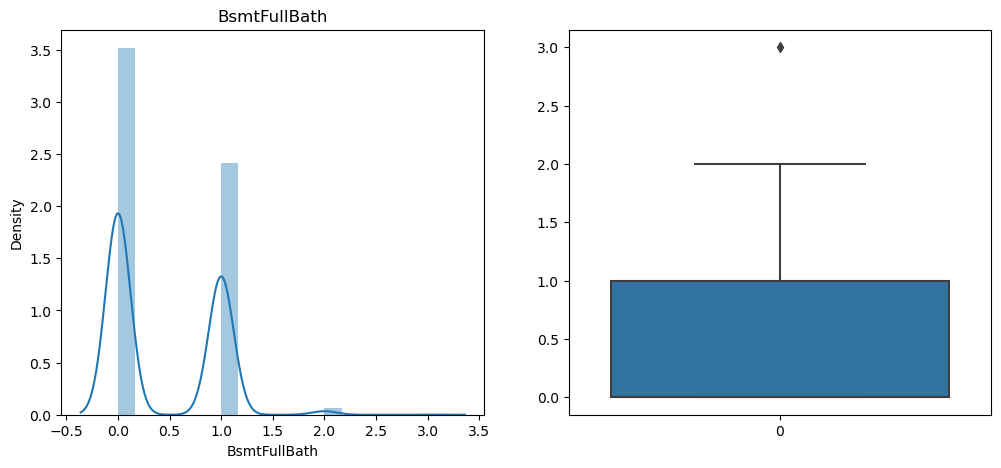

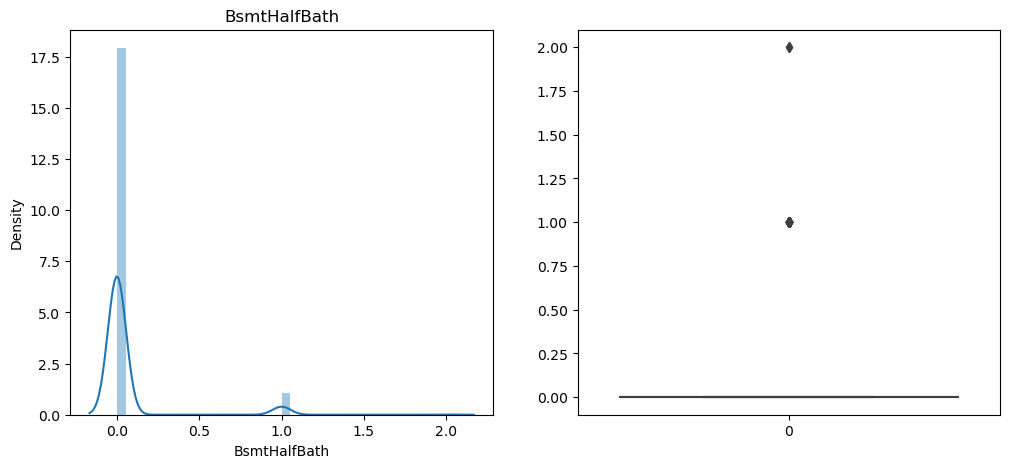

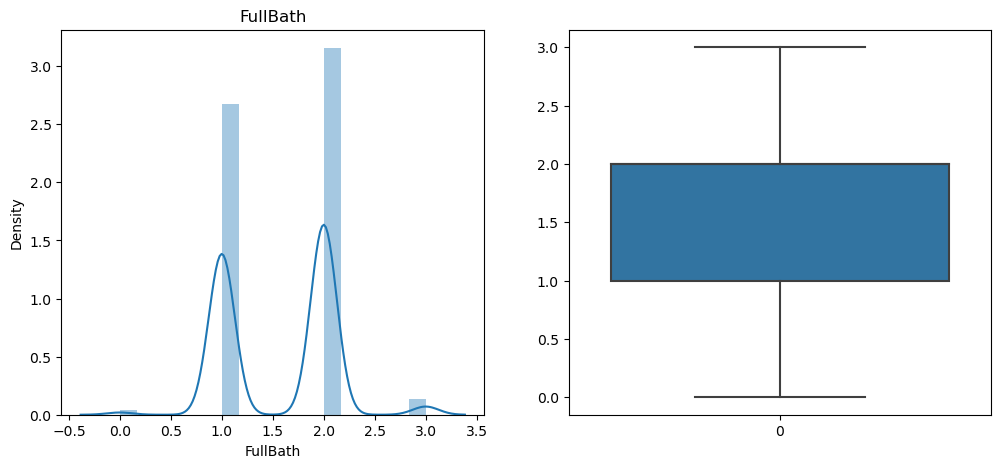

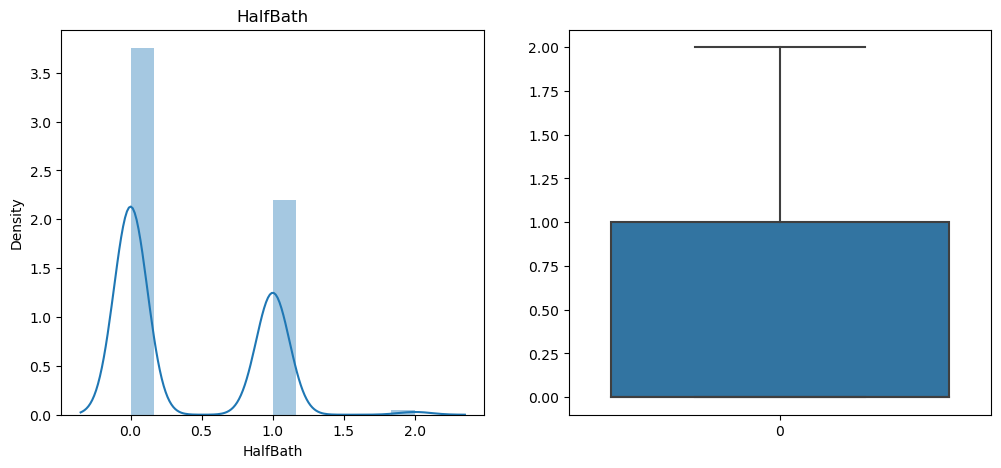

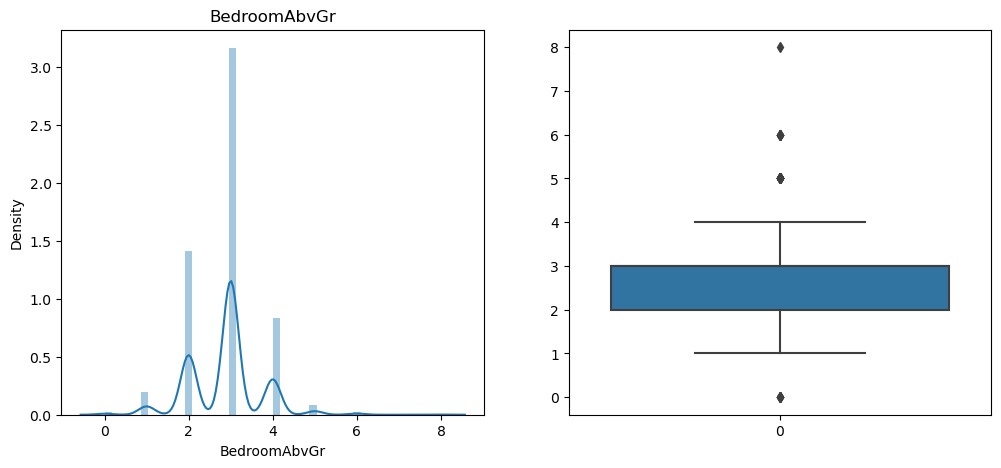

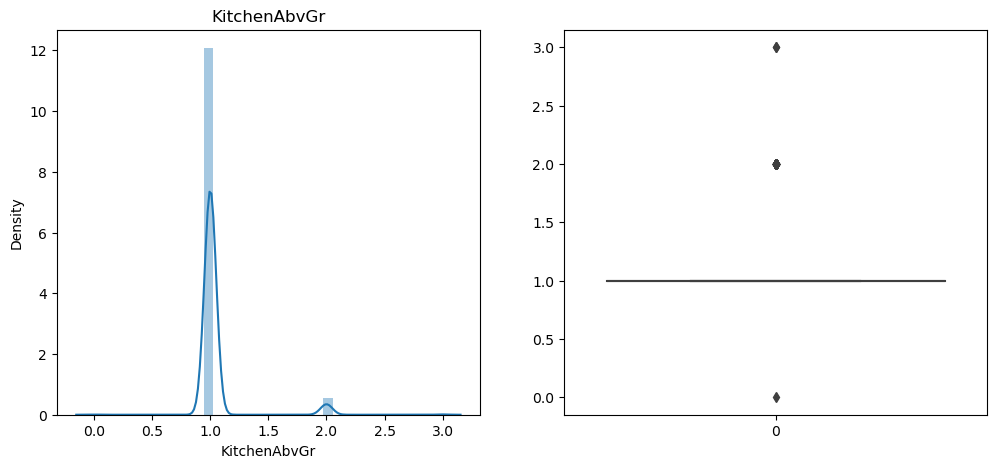

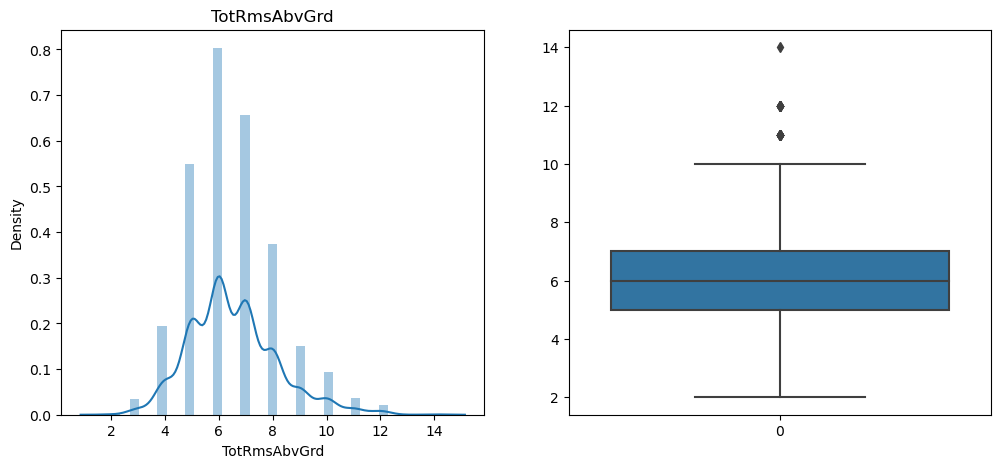

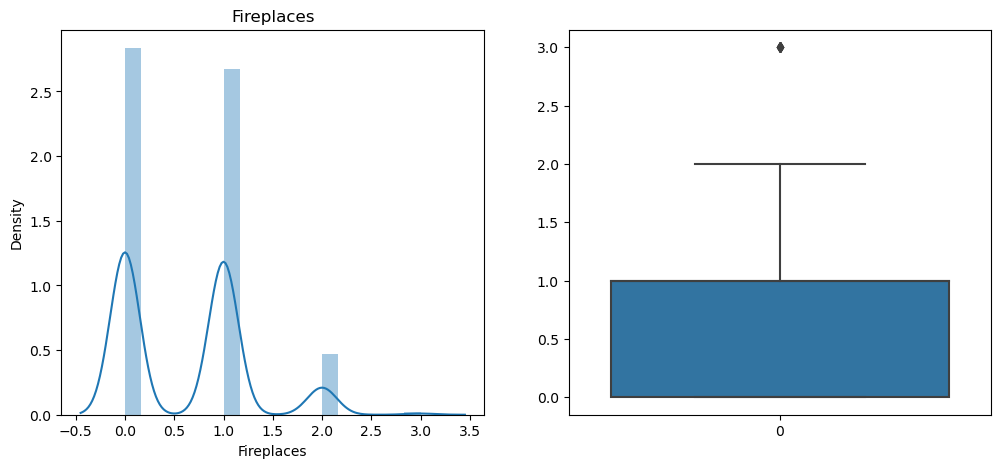

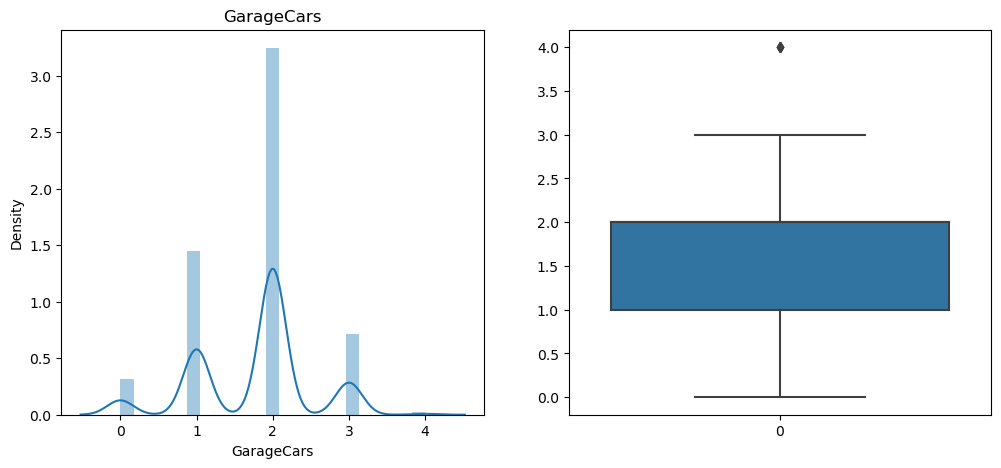

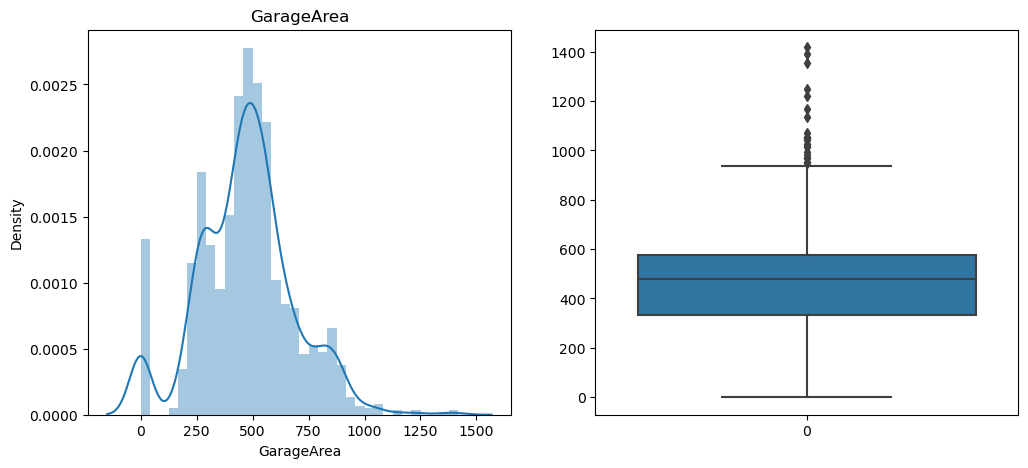

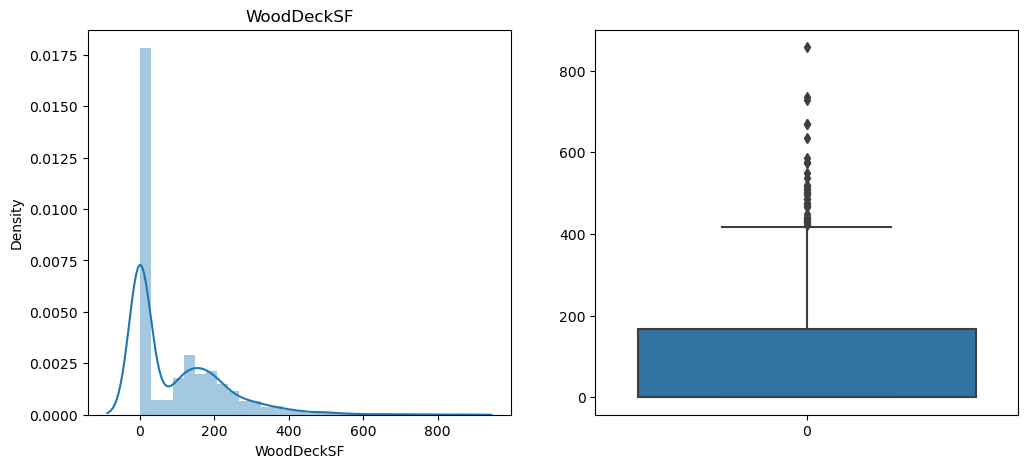

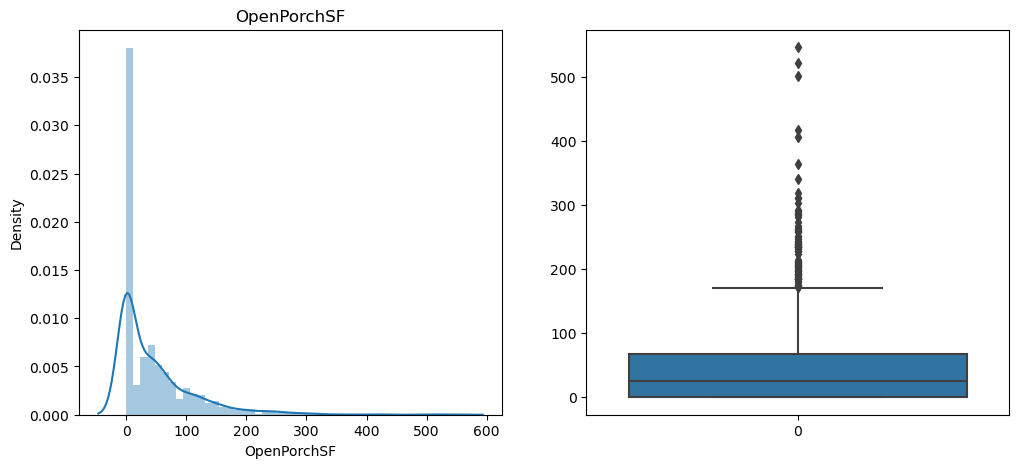

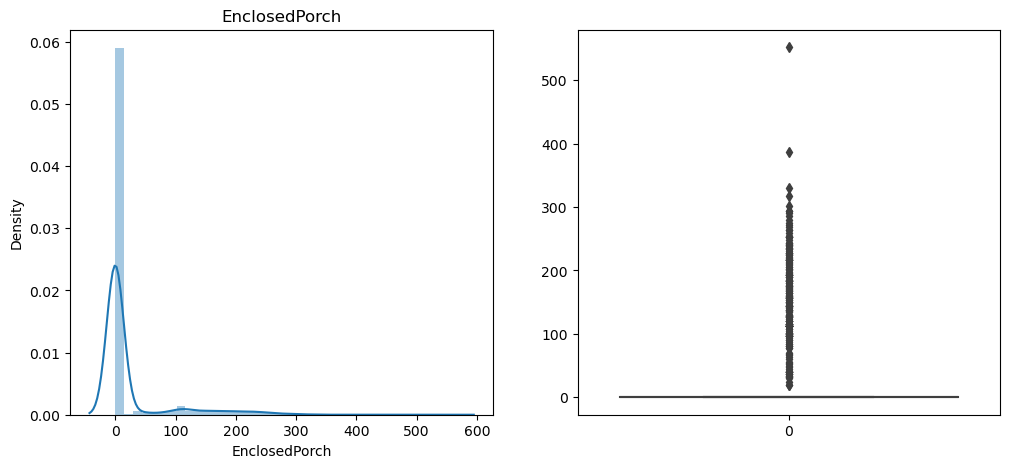

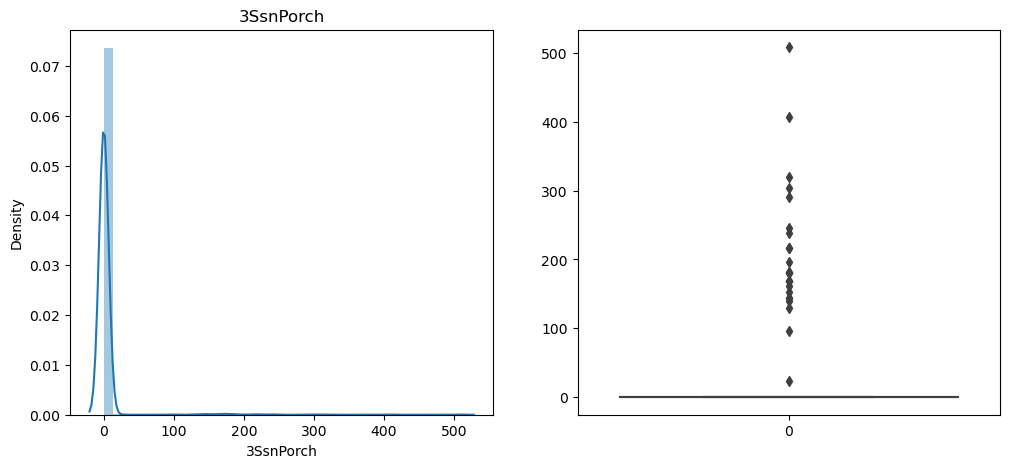

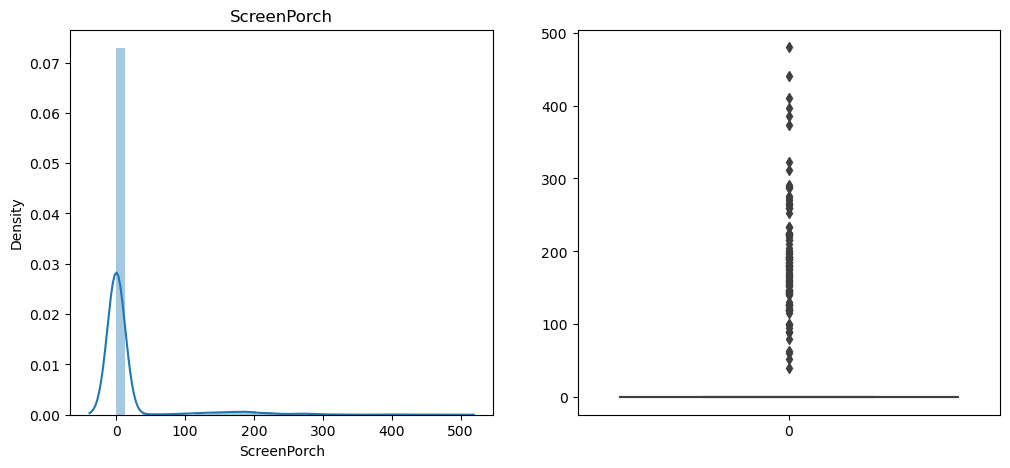

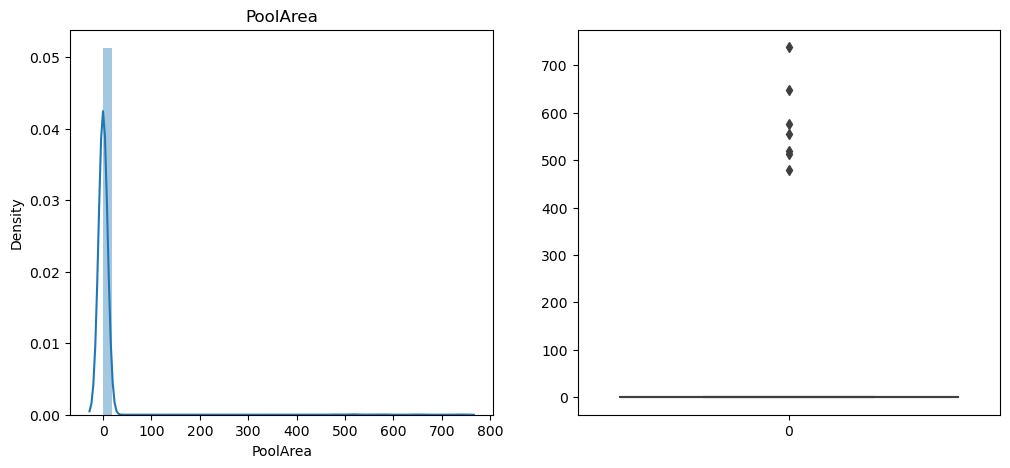

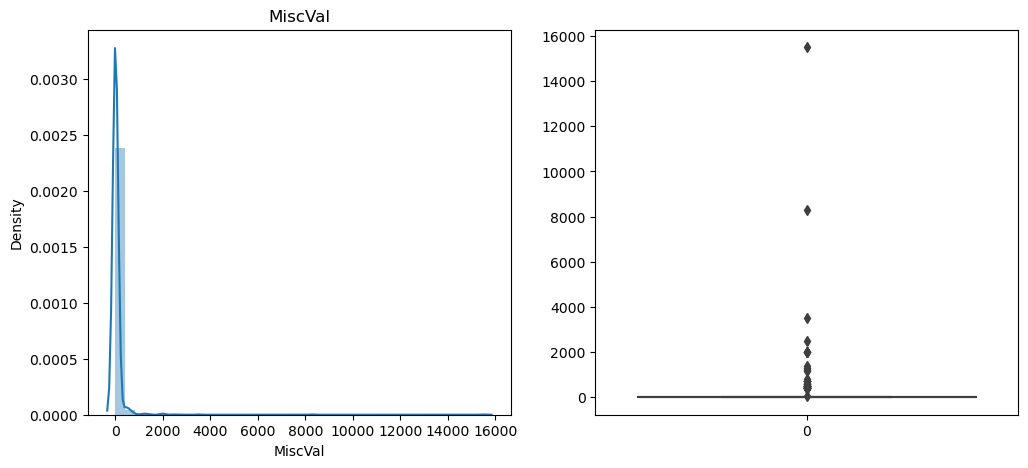

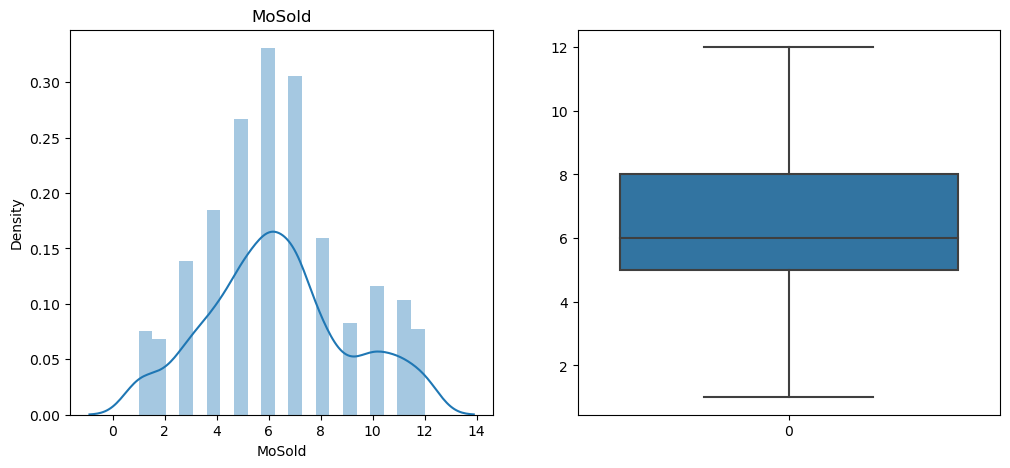

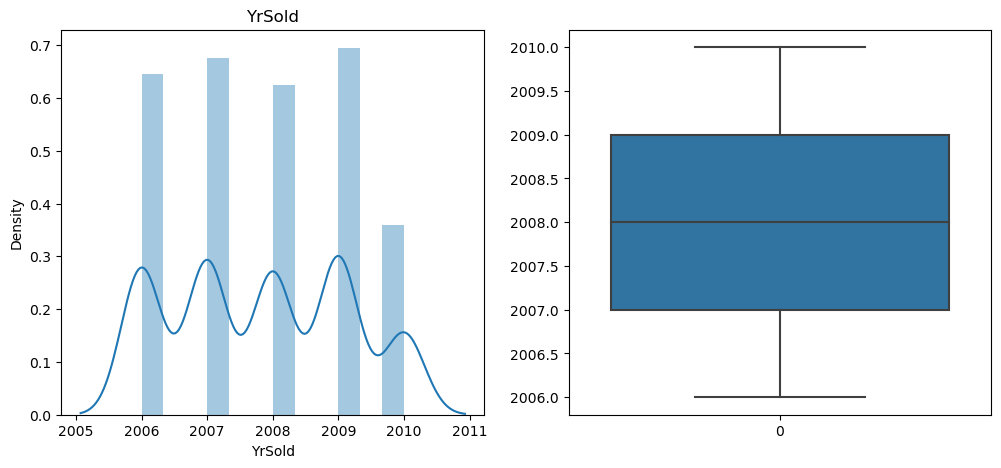

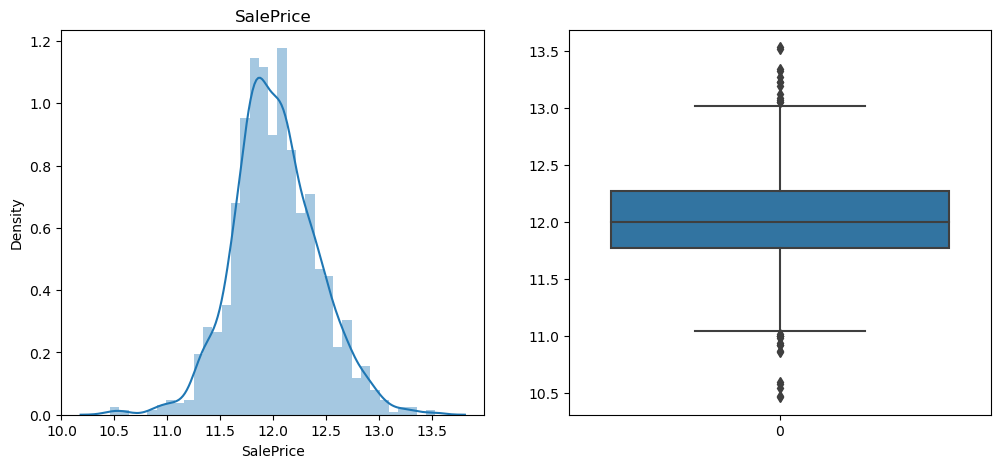

In [31]:
for col in df_num.columns:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 12})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

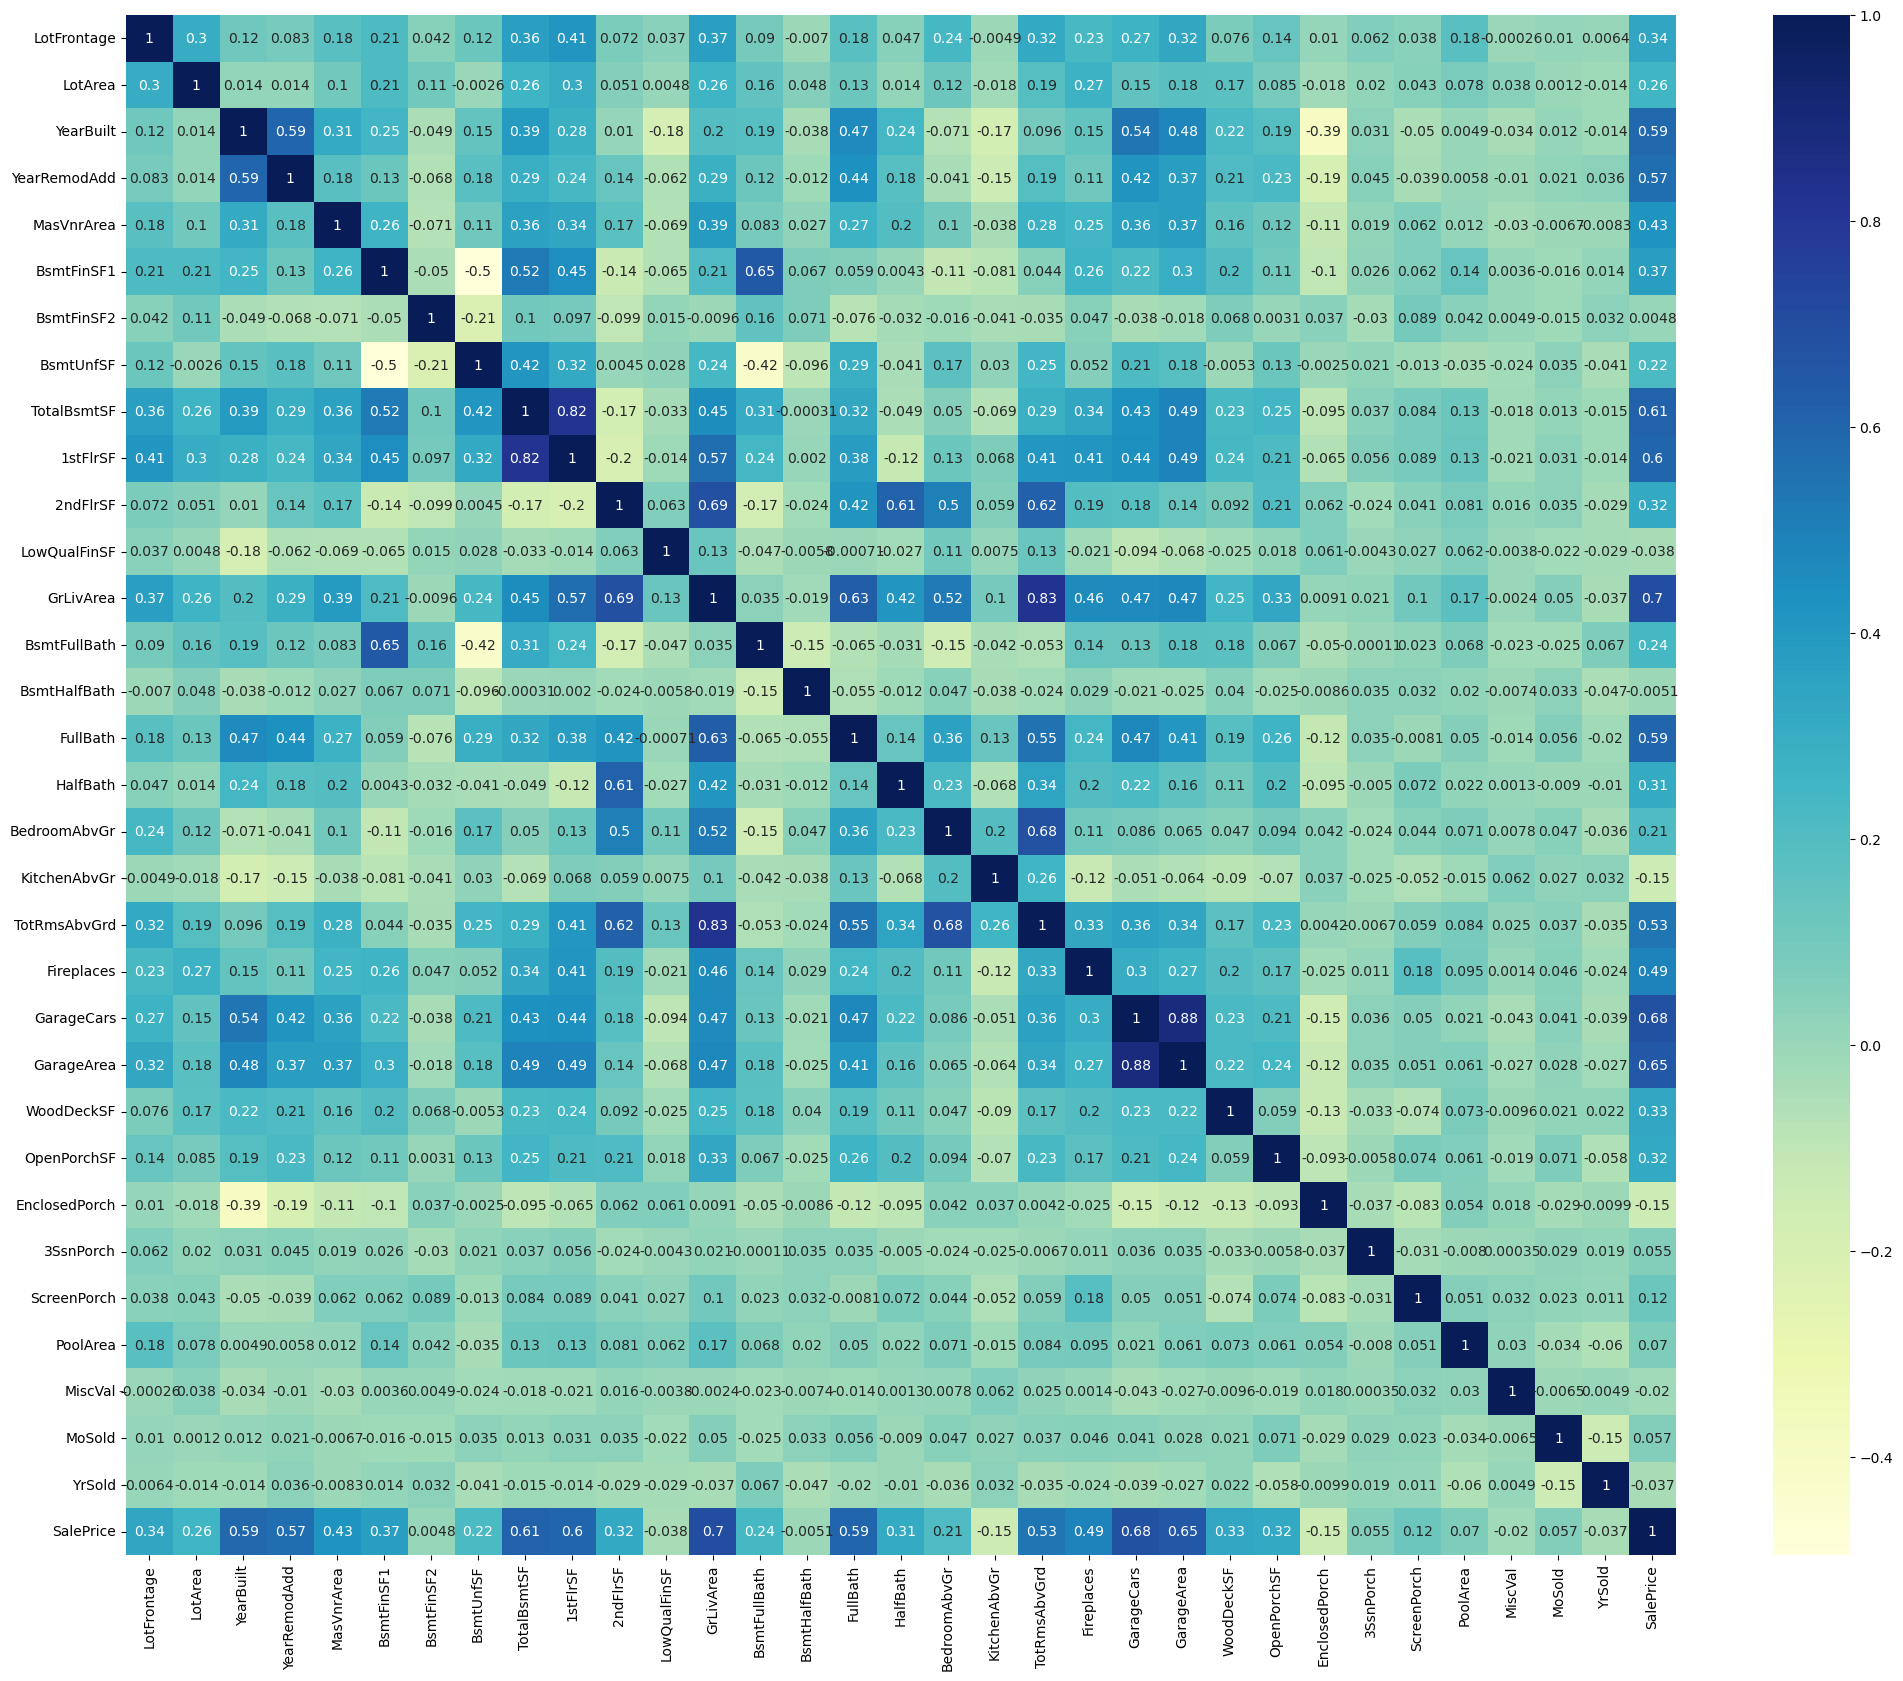

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap="YlGnBu");
plt.show()

#### Study of categarical variables

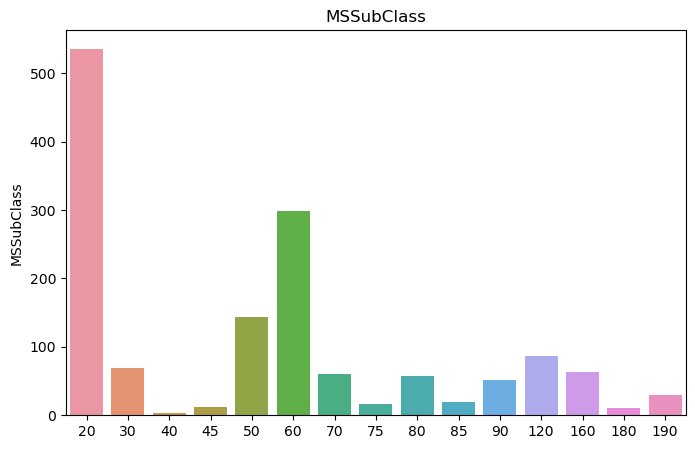

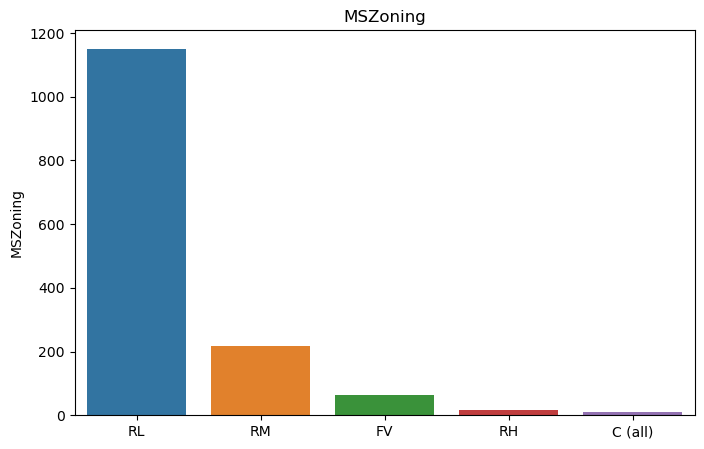

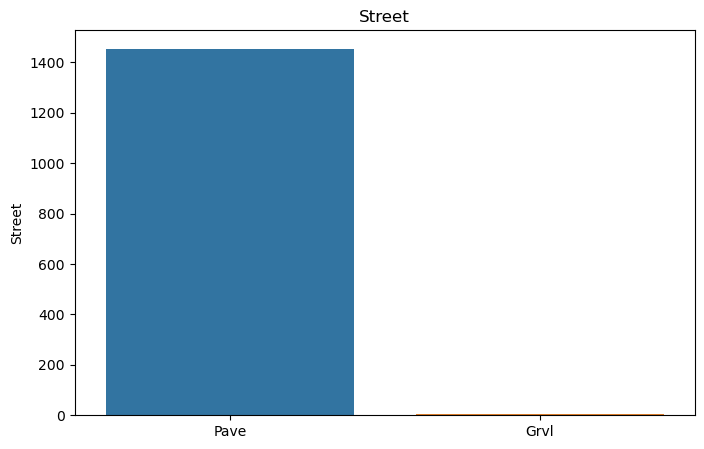

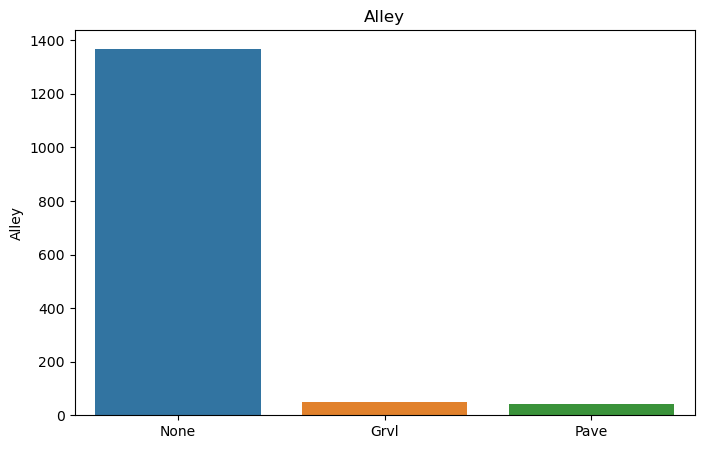

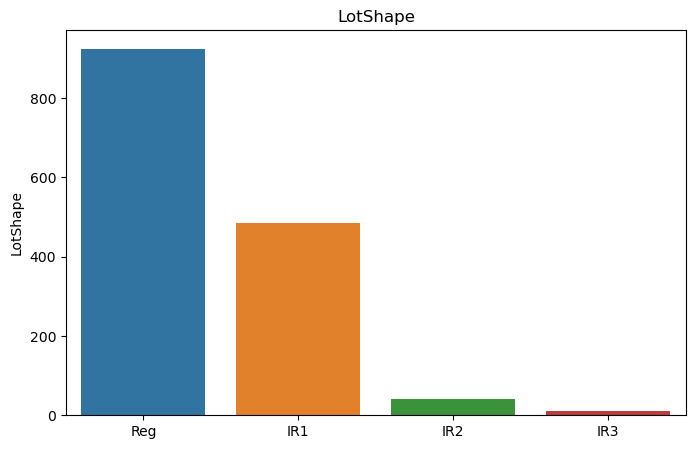

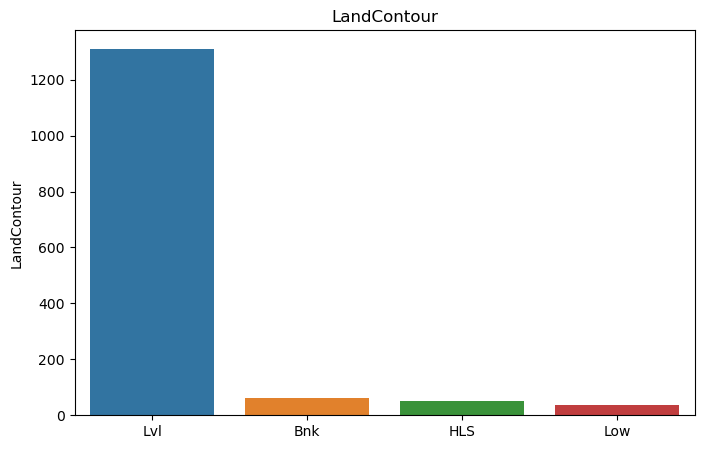

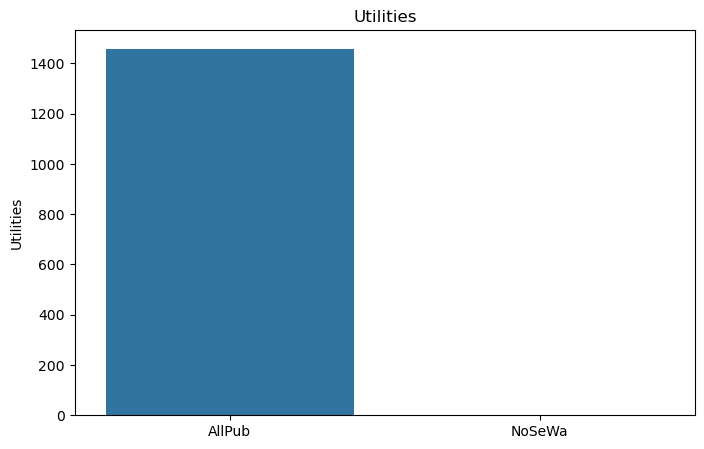

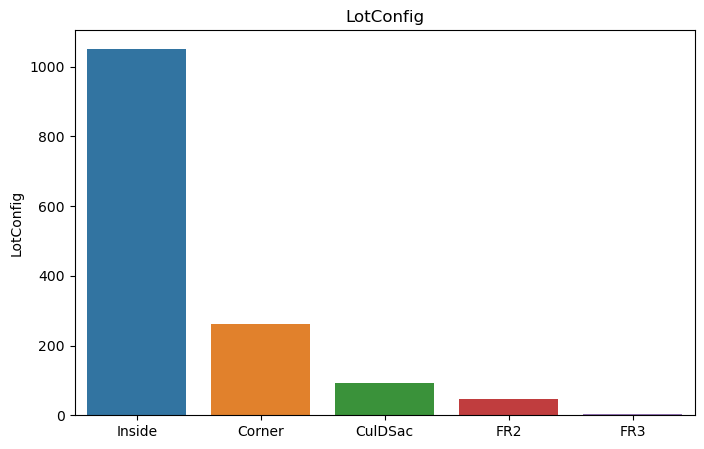

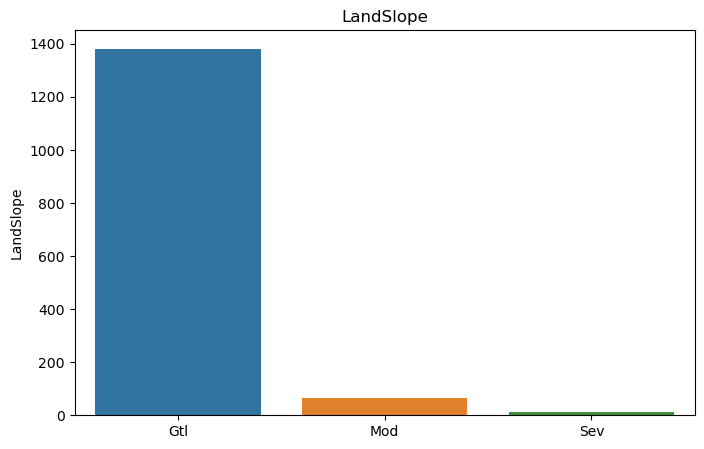

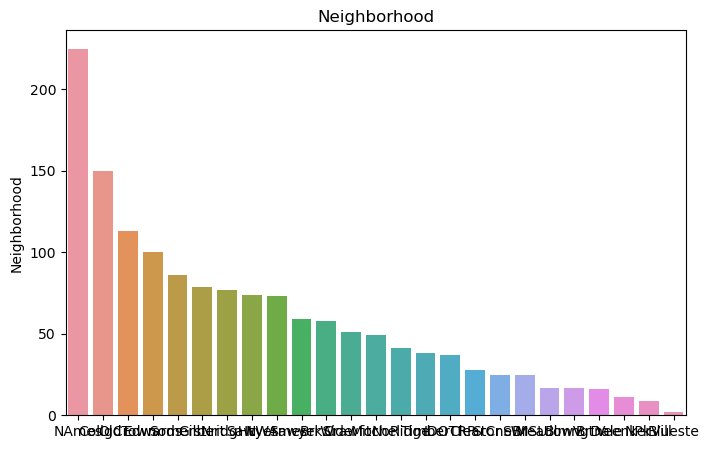

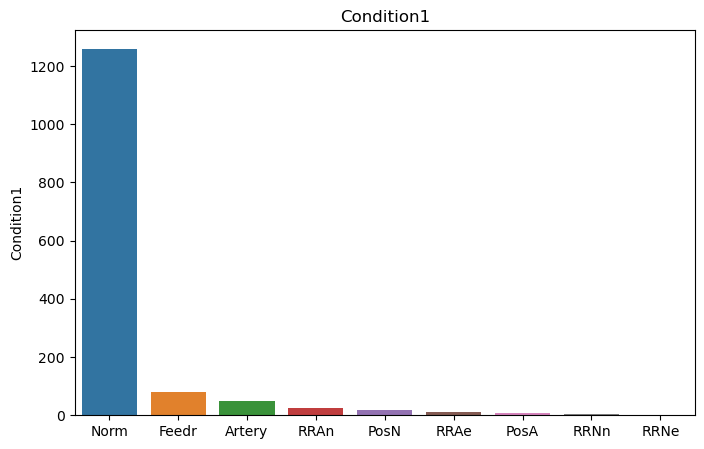

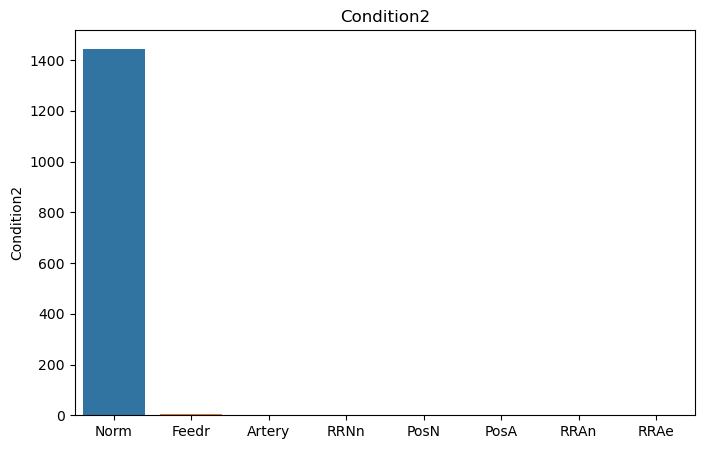

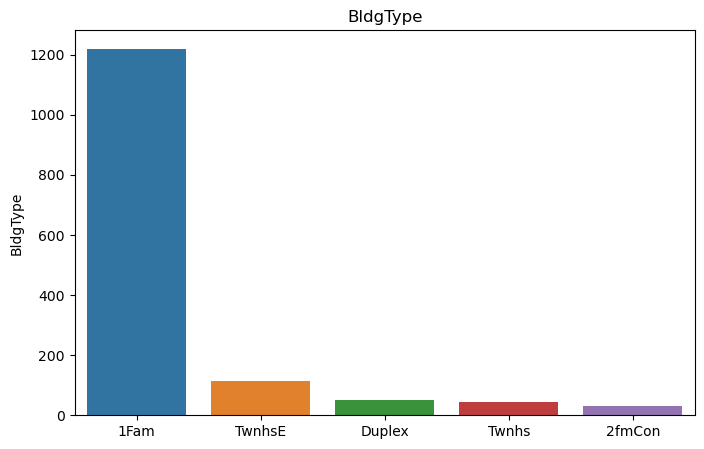

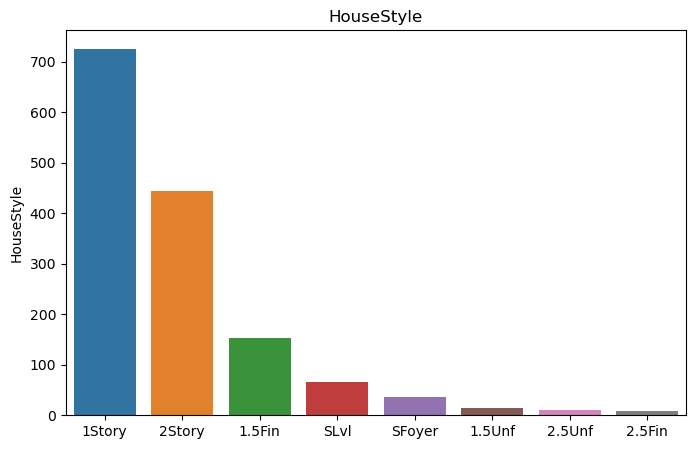

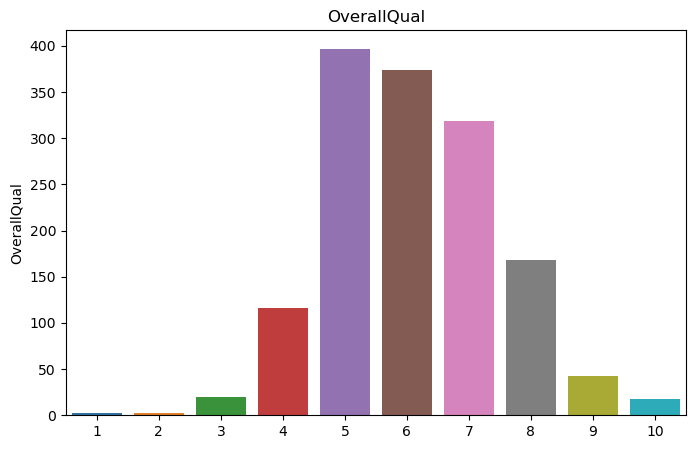

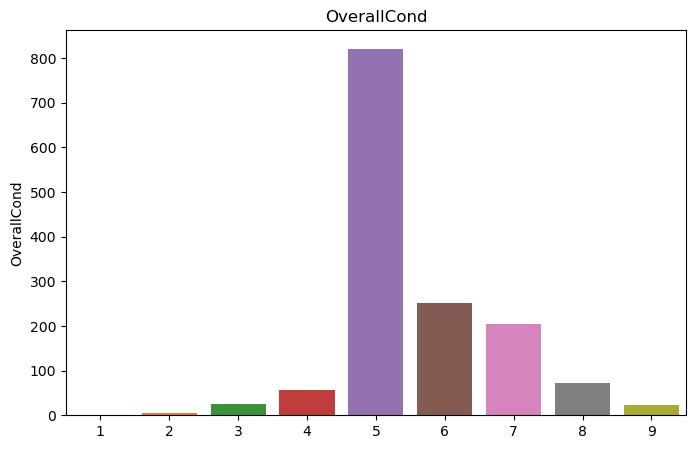

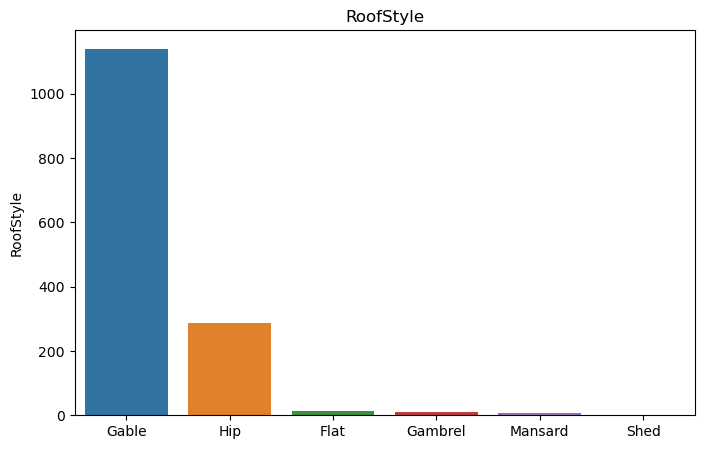

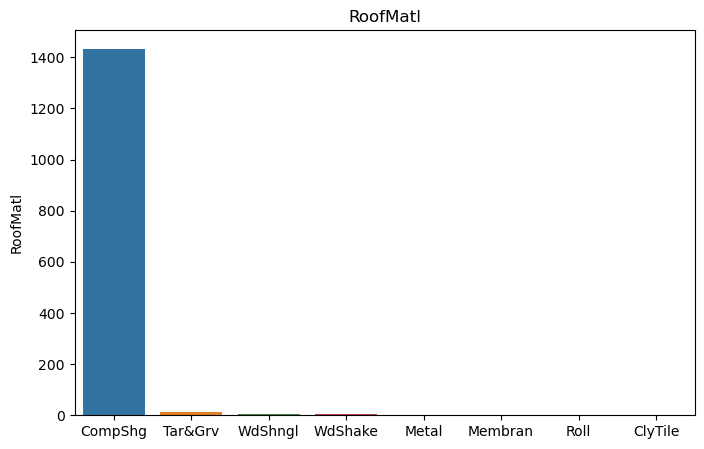

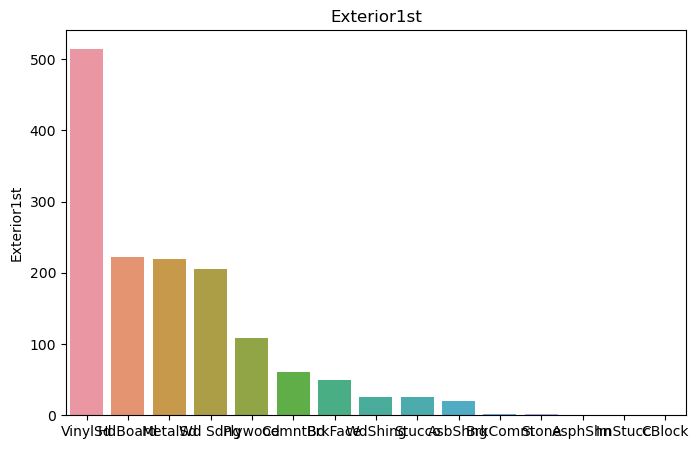

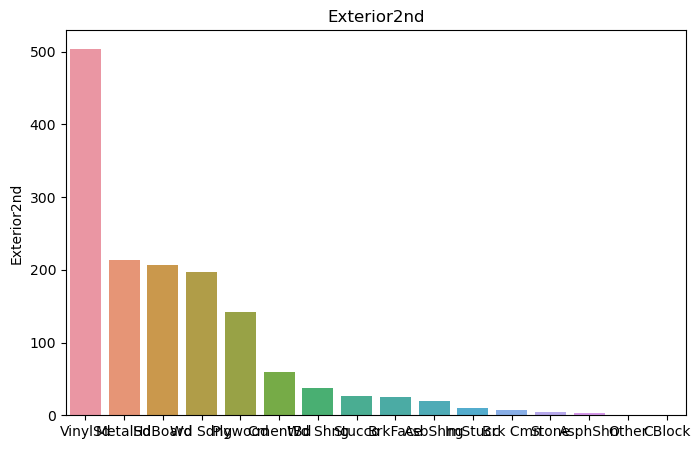

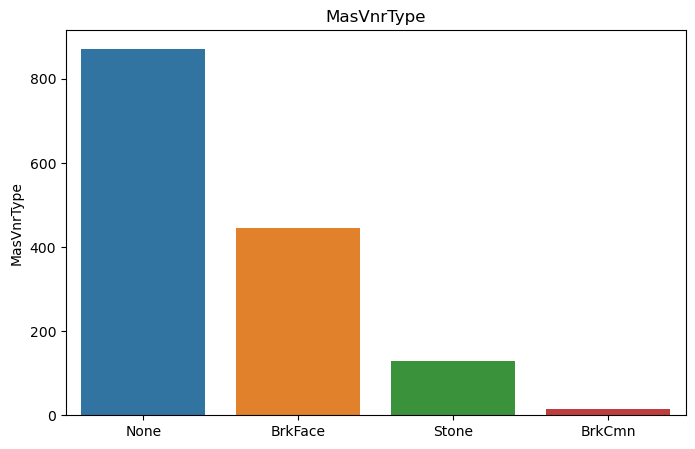

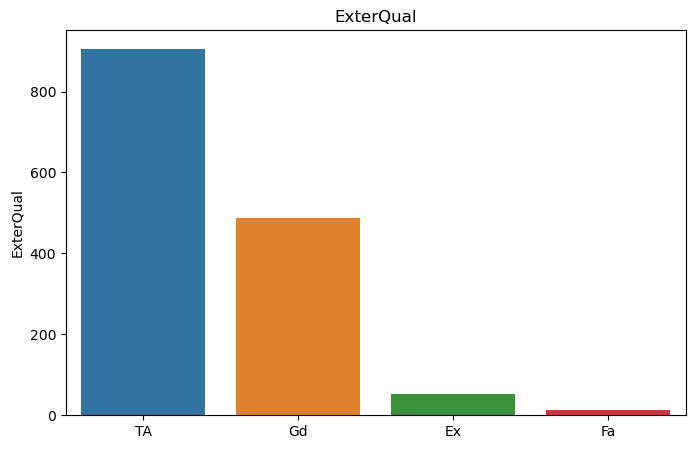

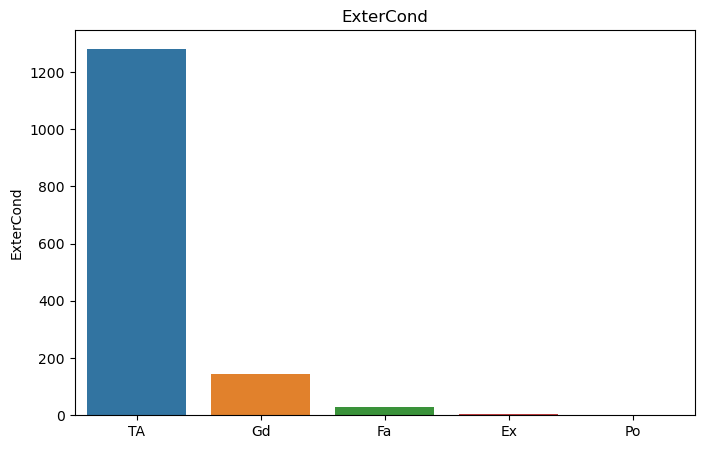

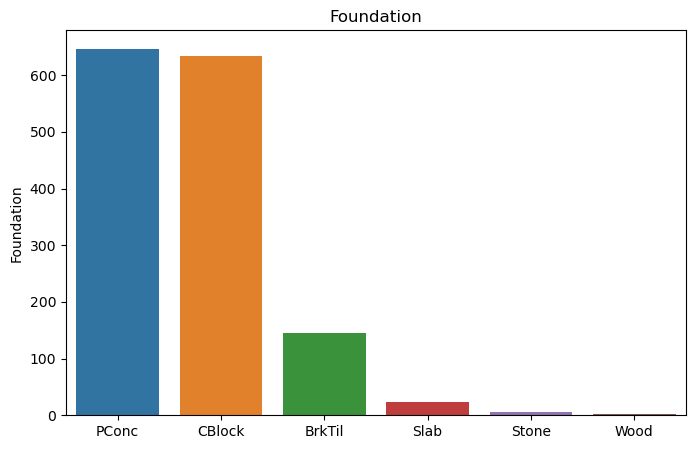

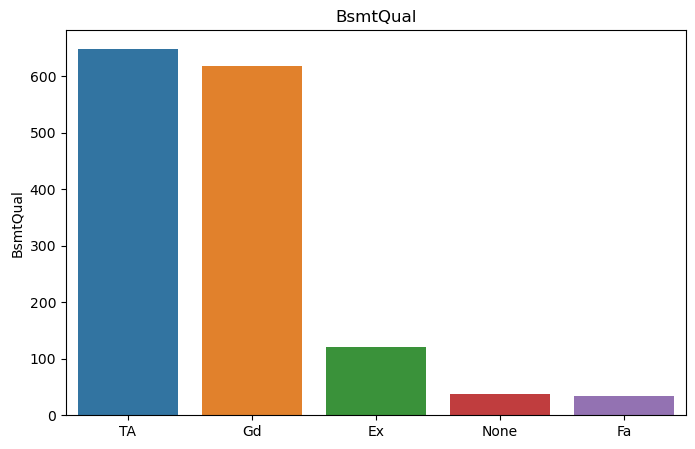

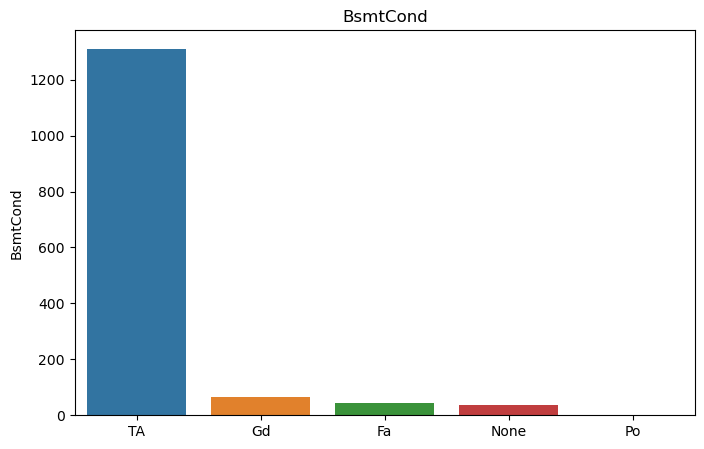

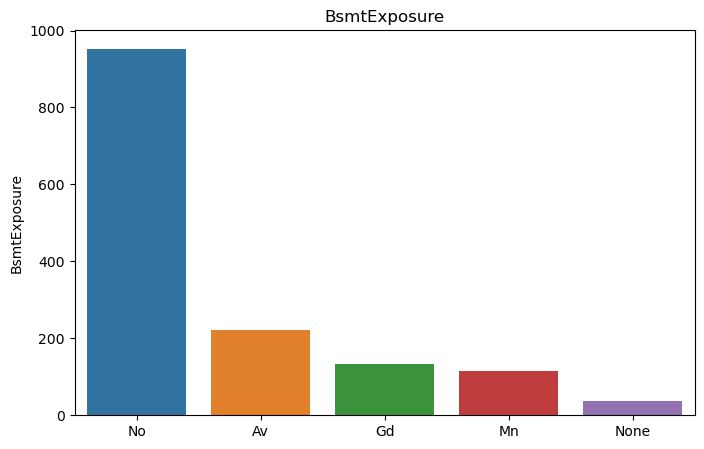

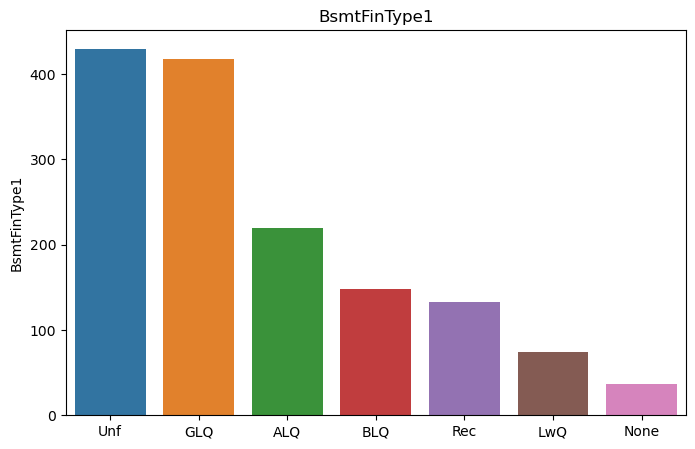

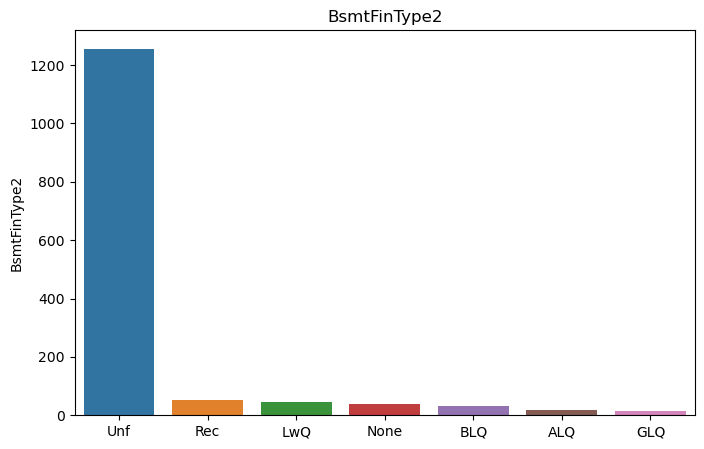

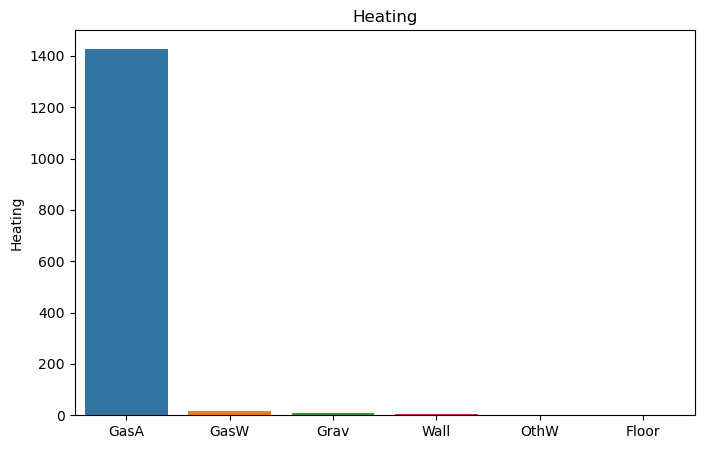

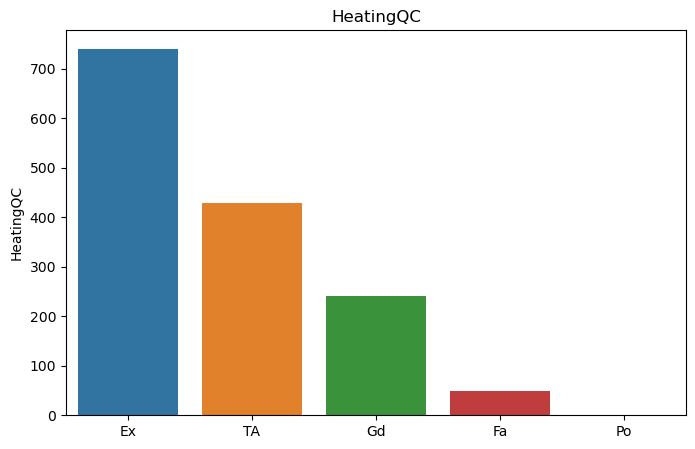

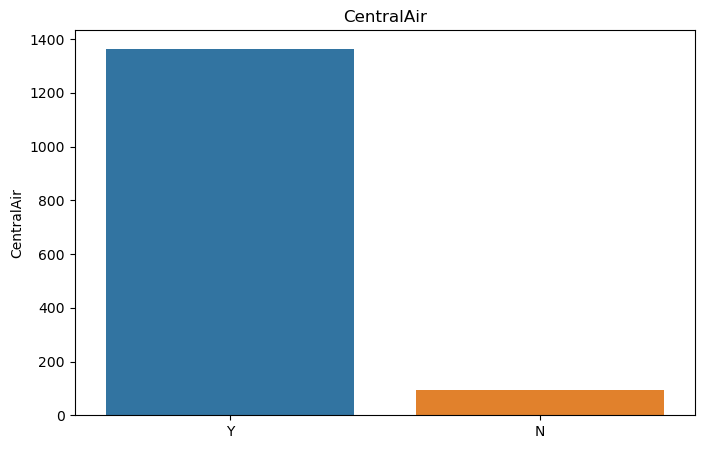

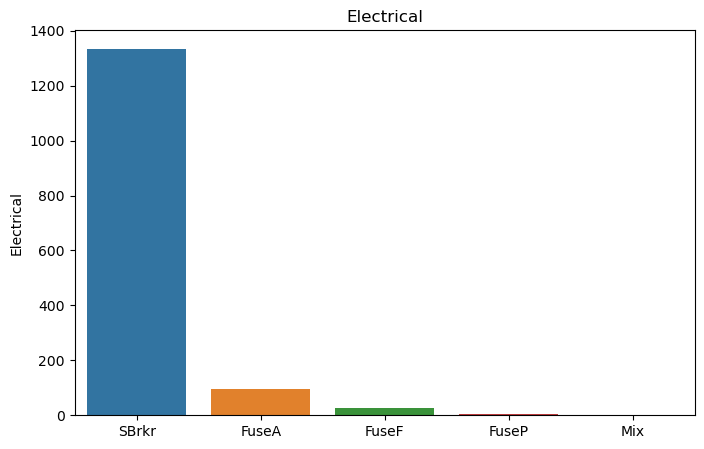

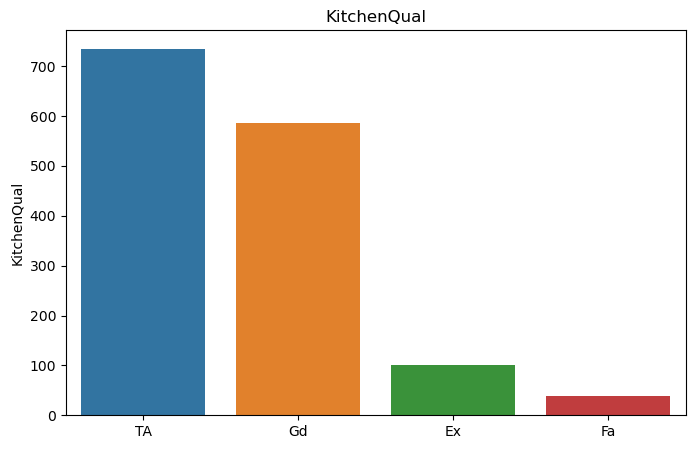

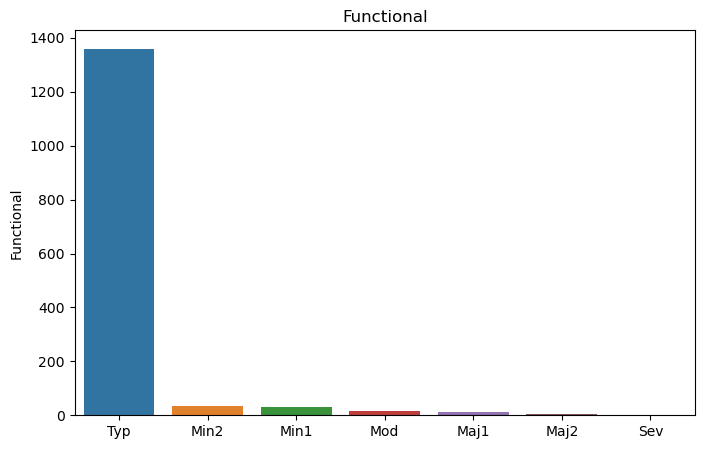

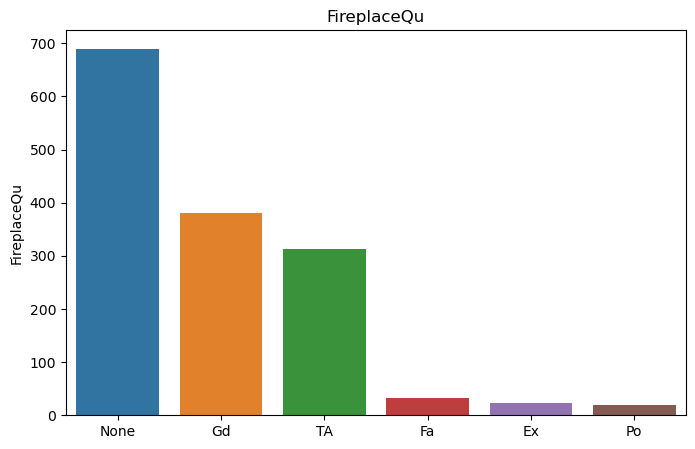

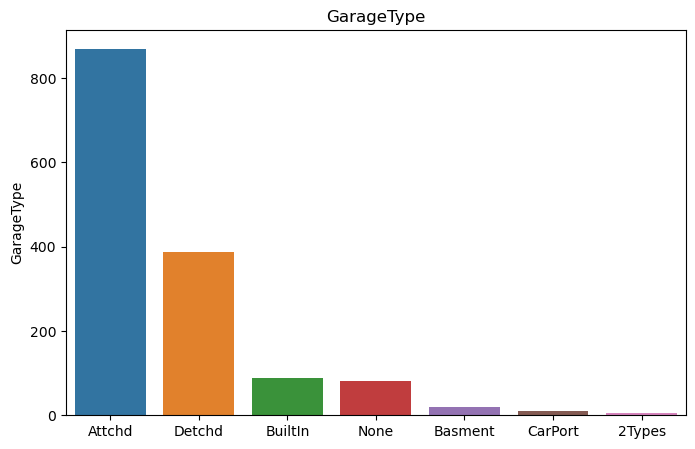

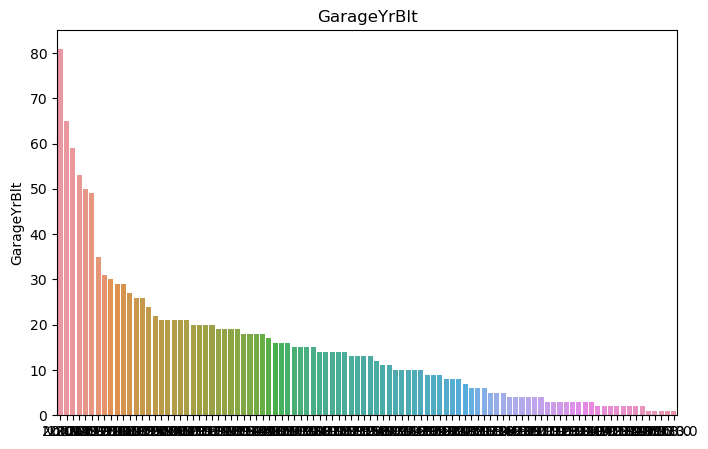

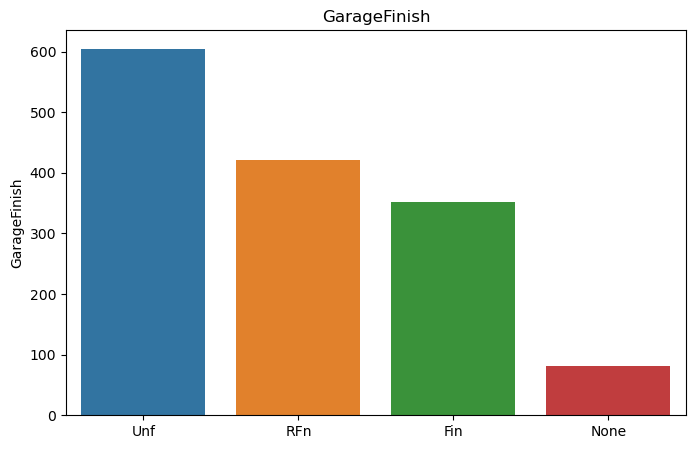

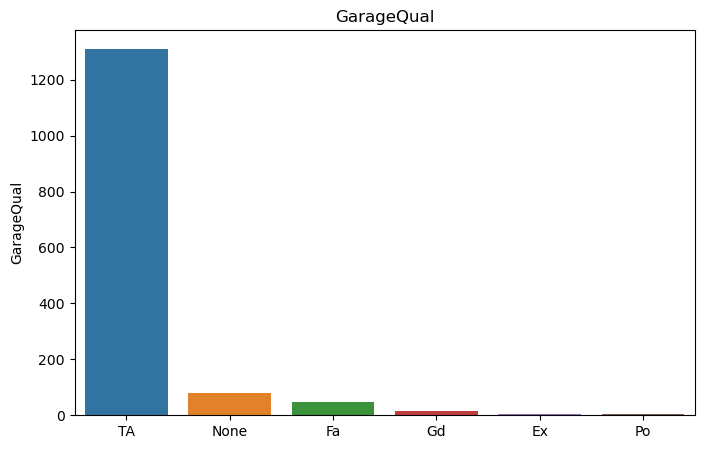

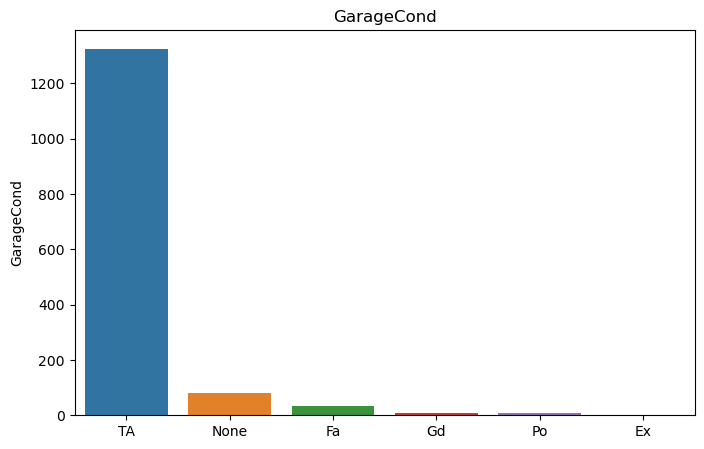

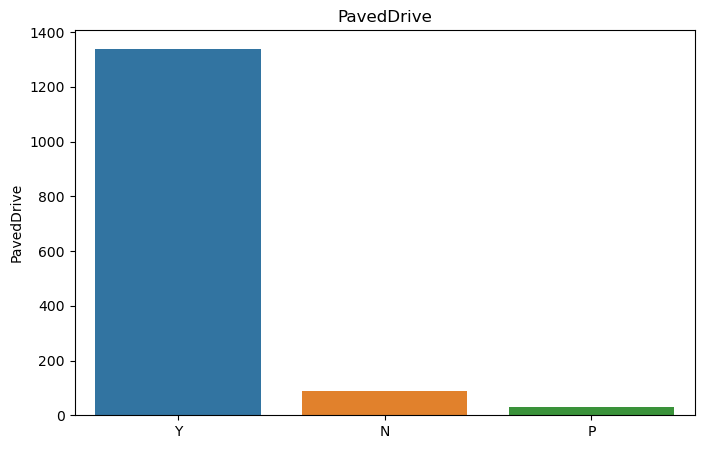

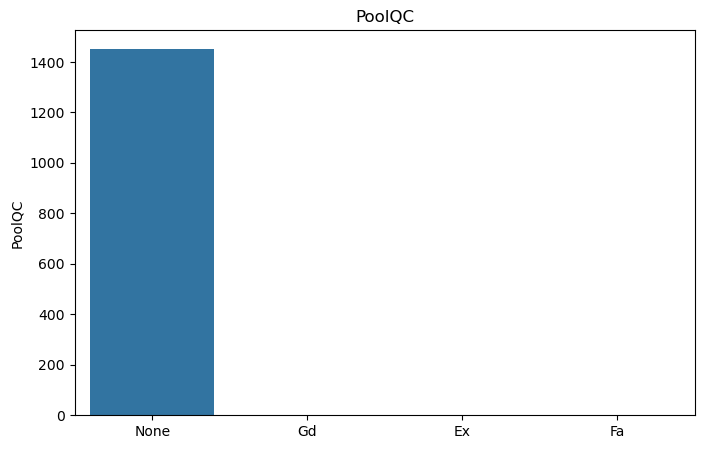

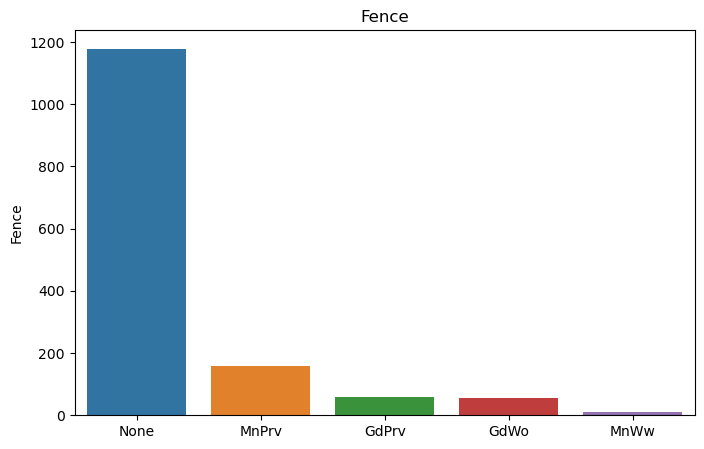

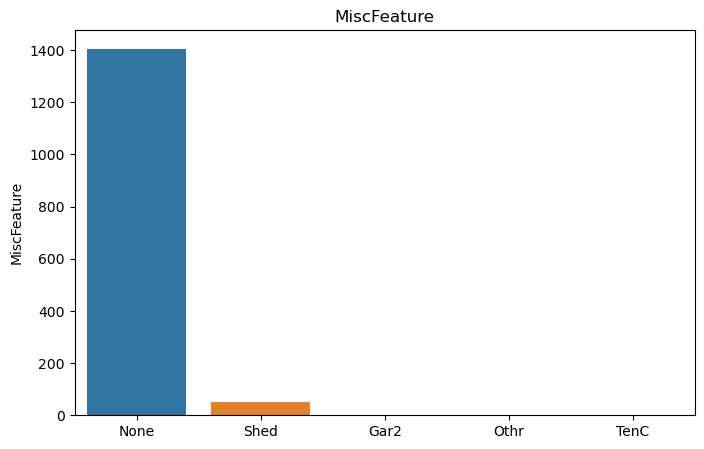

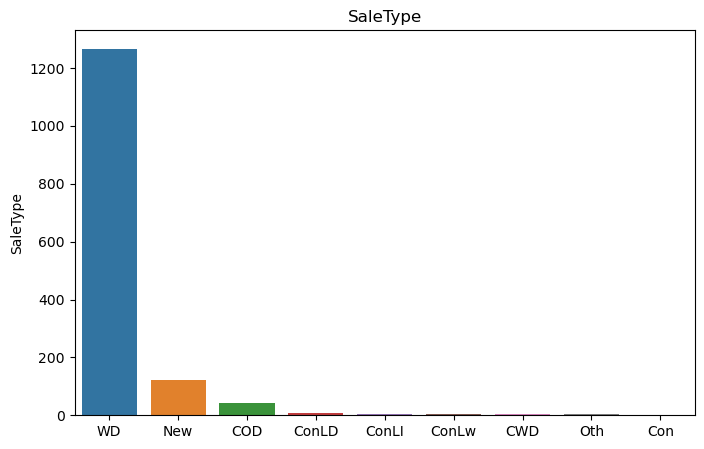

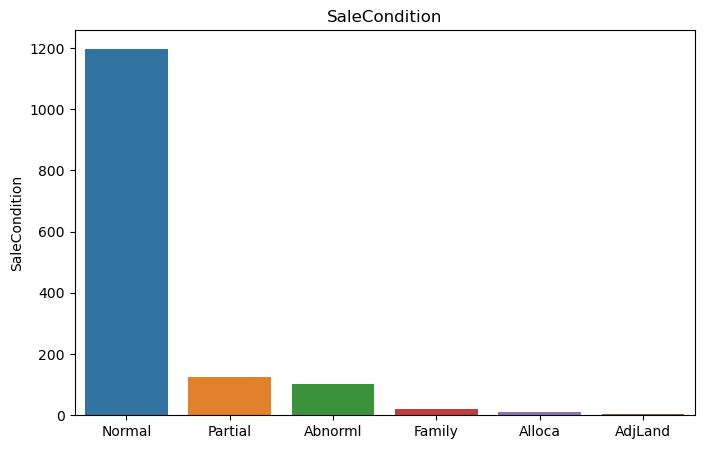

In [33]:
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 12})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

##### Remove the outliers

In [34]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

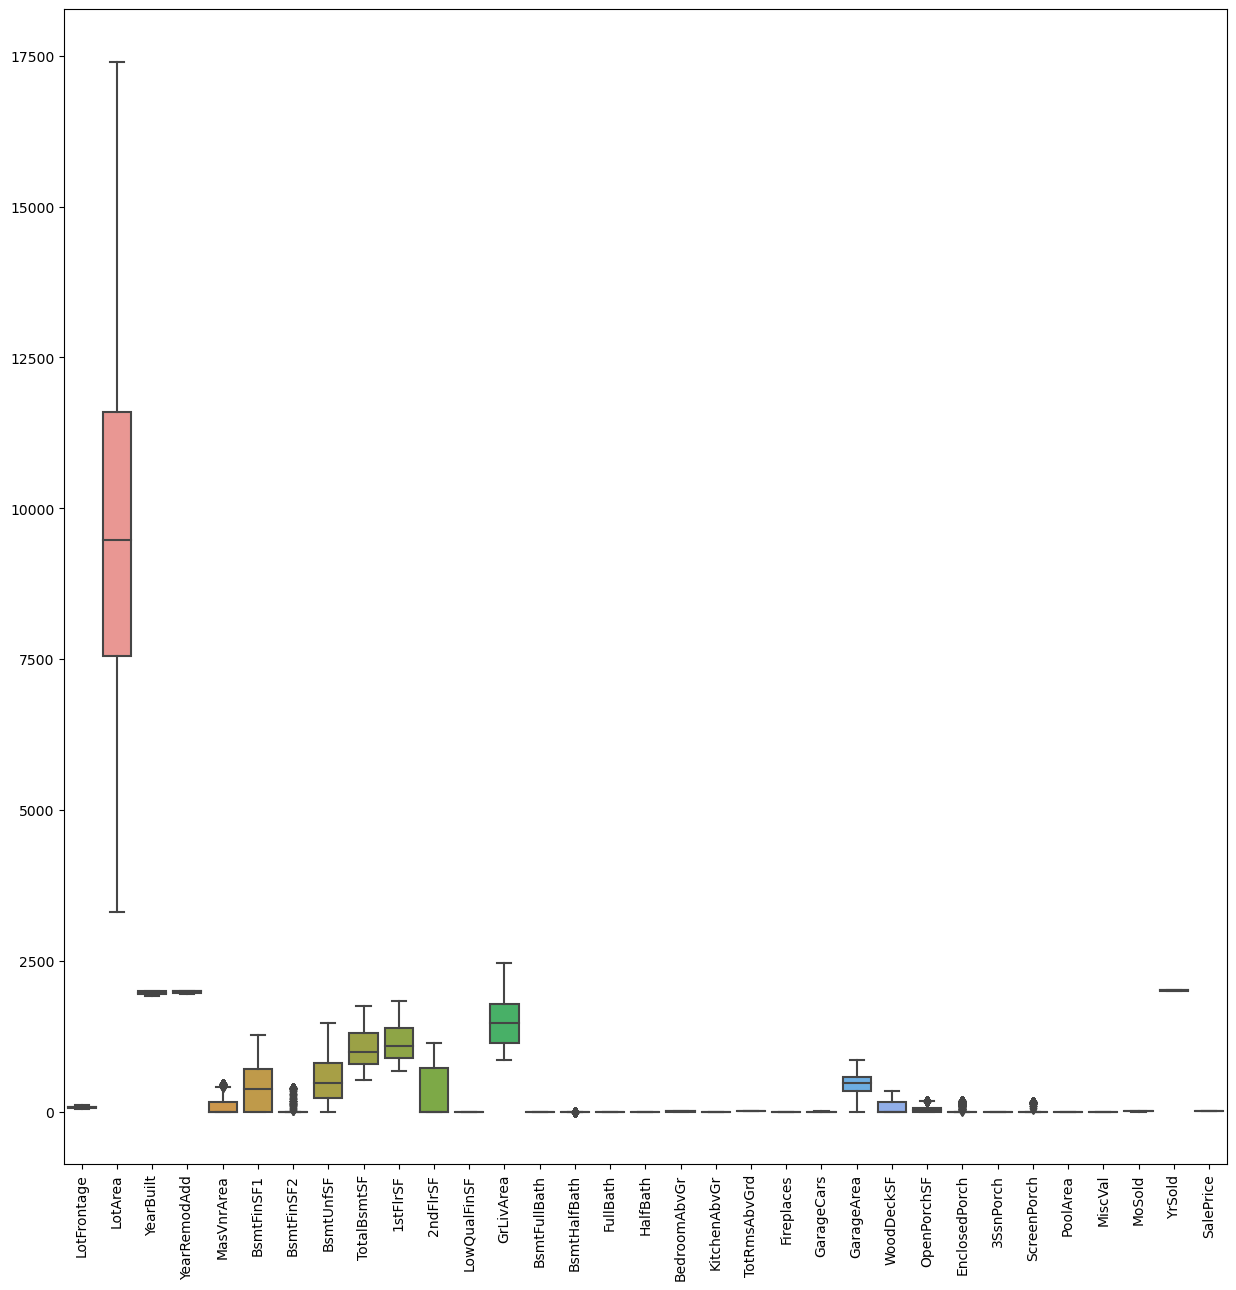

In [35]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(df_num);

### Data Preparation

#### Create dummy variables

In [36]:
df_cat_dum = pd.get_dummies(df_cat, drop_first=True)
df_cat_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
df1=pd.concat([df_num, df_cat_dum], axis=1)

In [38]:
df1.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1916,1970,0.0,216,0.0,540,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
X = df1.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196.0,706,0.0,150,856.0,856.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,0.0,978,0.0,284,1262.0,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,162.0,486,0.0,434,920.0,920.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1916,1970,0.0,216,0.0,540,756.0,961.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,350.0,655,0.0,490,1145.0,1145.0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
y = df1["SalePrice"]
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [41]:
#Spilitng the dataset for train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100) 

In [42]:
# scaling the train features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numcol=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
X_train[numcol] = scaler.fit_transform(X_train[numcol])

X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.456282,0.162696,0.098901,0.000000,0.000000,0.367347,0.0,0.269755,0.279403,0.164940,...,0,0,0,0,1,0,0,0,1,0
318,0.794269,0.467605,0.846154,0.754386,0.561404,0.774725,0.0,0.245232,0.670909,0.603514,...,0,0,0,0,1,0,0,0,1,0
239,0.235856,0.385345,0.318681,0.000000,0.000000,0.073783,0.0,0.436649,0.174840,0.107960,...,0,0,0,0,1,0,0,0,1,0
986,0.338722,0.141830,0.000000,0.929825,0.000000,0.000000,0.0,0.330381,0.000000,0.283217,...,0,0,0,0,1,0,0,0,1,0
1416,0.353417,0.569809,0.000000,0.000000,0.000000,0.000000,0.0,0.529292,0.208884,0.494734,...,0,0,0,0,1,0,0,0,1,0


In [43]:
# scaling the test features 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_test[numcol] = scaler.fit_transform(X_test[numcol])

X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.353417,0.403728,0.604396,0.368421,0.000000,0.483516,0.0,0.168937,0.279403,0.164940,...,0,0,0,0,1,0,0,0,1,0
57,0.779574,0.591457,0.967033,0.947368,0.000000,0.000000,0.0,0.585831,0.276161,0.161487,...,0,0,0,0,1,0,0,0,1,0
780,0.397502,0.323881,0.868132,0.807018,0.083333,0.000000,0.0,0.842643,0.581746,0.500777,...,0,0,0,0,1,0,0,0,1,0
382,0.632623,0.421117,0.989011,0.982456,0.000000,0.000000,0.0,0.639646,0.340196,0.229690,...,0,0,0,0,1,0,0,0,1,0
1170,0.588538,0.466186,0.670330,0.473684,0.000000,0.409733,0.0,0.391008,0.467456,0.384227,...,0,0,0,0,1,0,0,0,1,0


## Model building and evaluation

### Ridge Regression


In [44]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.001, 0.01, 0.1, 
 0.2, 0.4, 0.8, 0.9, 1.0, 2.0, 
 4.0, 8.0, 10.0,  100, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 0.9, 1.0,
                                   2.0, 4.0, 8.0, 10.0, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [45]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [46]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.52137195e-02  8.24798076e-02  8.22530181e-02  7.50486447e-02
  4.24961408e-03  6.15716366e-02  1.19381623e-02  7.77060334e-03
  1.29791354e-01  9.23002046e-02  9.59036256e-02  0.00000000e+00
  1.73320504e-01  2.07577178e-02 -7.14853120e-03  3.53990705e-02
  2.77336410e-02  1.12945713e-02  0.00000000e+00  2.55642197e-02
  2.38697899e-02  4.26771688e-02  8.05189427e-02  3.47299257e-02
  2.03993472e-02  1.84098981e-03  0.00000000e+00  1.88157367e-02
  0.00000000e+00  0.00000000e+00  6.85388556e-03 -8.18713525e-03
 -4.78681288e-02 -1.22382825e-02 -4.87971387e-03  1.49938491e-03
 -6.63077963e-03  3.94629131e-02  3.24453162e-02 -6.43045052e-03
  9.51998036e-03 -2.90347628e-02  2.23965731e-03 -4.49497424e-02
 -3.00663704e-02 -2.83094196e-02  3.41410551e-02  2.79276791e-02
  2.54096495e-02 -1.48896799e-02 -7.38394706e-03 -1.19541264e-03
  2.50630845e-02  6.92166877e-03 -1.70715653e-02  2.10275552e-03
  1.44557191e-02  1.97937244e-02  2.13758548e-02 -1.35769625e-02
  3.12006105e-02 -2.07718

In [47]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9501186322469023
0.8974254603608222
6.356651506417656
5.5254224648033095
0.0062259074499683206
0.012615119782655958


## Lasso

In [48]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.8, 0.9, 1.0,
                                   2.0, 4.0, 8.0, 10.0, 100, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [50]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [51]:
lasso.coef_

array([ 0.00262097,  0.08046759,  0.12201564,  0.08526122,  0.        ,
        0.0642003 ,  0.        , -0.        ,  0.16683726,  0.        ,
        0.00846838,  0.        ,  0.39247837,  0.02095534,  0.        ,
        0.01270943,  0.02288911,  0.        ,  0.        ,  0.        ,
        0.00519773,  0.02599309,  0.09529112,  0.02892324,  0.00939622,
        0.        ,  0.        ,  0.00395083,  0.        ,  0.        ,
        0.        , -0.        , -0.01687881, -0.        ,  0.        ,
        0.        ,  0.        ,  0.02097066,  0.        ,  0.        ,
        0.        , -0.02200456,  0.        , -0.0243007 , -0.        ,
       -0.00071059,  0.        ,  0.        ,  0.        , -0.04415948,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00045373,  0.        ,  0.        ,  0.        , -0.        ,
        0.02062967, -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.01612481,  0.04

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9325313463588625
0.8908407603561964
8.597894126054193
5.880123050909113
0.008421052033353764
0.013424938472395235


In [53]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.950119,0.932531
1,R2 Score (Test),0.897425,0.890841
2,RSS (Train),6.356652,8.597894
3,RSS (Test),5.525422,5.880123
4,MSE (Train),0.078904,0.091766
5,MSE (Test),0.112317,0.115866


### Lets observe the changes in the coefficients after regularization

In [54]:
betas = pd.DataFrame(index=X.columns)

In [55]:
betas.rows = X.columns

In [56]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [57]:
pd.set_option('display.max_rows', None)
betas.head(383)

,Ridge,Lasso
LotFrontage,0.025214,0.002621
LotArea,0.082480,0.080468
YearBuilt,0.082253,0.122016
YearRemodAdd,0.075049,0.085261
MasVnrArea,0.004250,0.000000
BsmtFinSF1,0.061572,0.064200
BsmtFinSF2,0.011938,0.000000
BsmtUnfSF,0.007771,-0.000000
TotalBsmtSF,0.129791,0.166837
1stFlrSF,0.092300,0.000000


### Verify with dobule the value of alpha for subjective questions.

#### Ridge regression with double the value of alpha

In [58]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
print(model_cv.best_params_)

{'alpha': 8.0}


In [60]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.52137195e-02  8.24798076e-02  8.22530181e-02  7.50486447e-02
  4.24961408e-03  6.15716366e-02  1.19381623e-02  7.77060334e-03
  1.29791354e-01  9.23002046e-02  9.59036256e-02  0.00000000e+00
  1.73320504e-01  2.07577178e-02 -7.14853120e-03  3.53990705e-02
  2.77336410e-02  1.12945713e-02  0.00000000e+00  2.55642197e-02
  2.38697899e-02  4.26771688e-02  8.05189427e-02  3.47299257e-02
  2.03993472e-02  1.84098981e-03  0.00000000e+00  1.88157367e-02
  0.00000000e+00  0.00000000e+00  6.85388556e-03 -8.18713525e-03
 -4.78681288e-02 -1.22382825e-02 -4.87971387e-03  1.49938491e-03
 -6.63077963e-03  3.94629131e-02  3.24453162e-02 -6.43045052e-03
  9.51998036e-03 -2.90347628e-02  2.23965731e-03 -4.49497424e-02
 -3.00663704e-02 -2.83094196e-02  3.41410551e-02  2.79276791e-02
  2.54096495e-02 -1.48896799e-02 -7.38394706e-03 -1.19541264e-03
  2.50630845e-02  6.92166877e-03 -1.70715653e-02  2.10275552e-03
  1.44557191e-02  1.97937244e-02  2.13758548e-02 -1.35769625e-02
  3.12006105e-02 -2.07718

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9501186322469023
0.8974254603608222
6.356651506417656
5.5254224648033095
0.0062259074499683206
0.012615119782655958


#### Lasso regression with double the value of alpha

In [62]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [64]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
lasso.coef_

array([ 0.00262097,  0.08046759,  0.12201564,  0.08526122,  0.        ,
        0.0642003 ,  0.        , -0.        ,  0.16683726,  0.        ,
        0.00846838,  0.        ,  0.39247837,  0.02095534,  0.        ,
        0.01270943,  0.02288911,  0.        ,  0.        ,  0.        ,
        0.00519773,  0.02599309,  0.09529112,  0.02892324,  0.00939622,
        0.        ,  0.        ,  0.00395083,  0.        ,  0.        ,
        0.        , -0.        , -0.01687881, -0.        ,  0.        ,
        0.        ,  0.        ,  0.02097066,  0.        ,  0.        ,
        0.        , -0.02200456,  0.        , -0.0243007 , -0.        ,
       -0.00071059,  0.        ,  0.        ,  0.        , -0.04415948,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.00045373,  0.        ,  0.        ,  0.        , -0.        ,
        0.02062967, -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.01612481,  0.04

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9325313463588625
0.8908407603561964
8.597894126054193
5.880123050909113
0.008421052033353764
0.013424938472395235


In [67]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.950119,0.932531
1,R2 Score (Test),0.897425,0.890841
2,RSS (Train),6.356652,8.597894
3,RSS (Test),5.525422,5.880123
4,MSE (Train),0.078904,0.091766
5,MSE (Test),0.112317,0.115866


In [68]:
#Changes in the coefficient after double the alpha

In [69]:
betas = pd.DataFrame(index=X.columns)

In [70]:
betas.rows = X.columns

In [71]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [72]:
pd.set_option('display.max_rows', None)
betas.head(383)

,Ridge,Lasso
LotFrontage,0.025214,0.002621
LotArea,0.082480,0.080468
YearBuilt,0.082253,0.122016
YearRemodAdd,0.075049,0.085261
MasVnrArea,0.004250,0.000000
BsmtFinSF1,0.061572,0.064200
BsmtFinSF2,0.011938,0.000000
BsmtUnfSF,0.007771,-0.000000
TotalBsmtSF,0.129791,0.166837
1stFlrSF,0.092300,0.000000


#### Lasso model with exculding the five most important predictor variables "GrLivArea", "TotalBsmtSF", "OverallQual_9","OverallQual_8" and "YearBuilt"

In [73]:
# dropping five important predictor variables. 
X_train = X_train.drop(['GrLivArea', 'TotalBsmtSF','OverallQual_9','OverallQual_8', 'YearBuilt'], axis=1)
X_test=X_test.drop(['GrLivArea', 'TotalBsmtSF','OverallQual_9','OverallQual_8', 'YearBuilt'], axis=1)

In [74]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [76]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [77]:
lasso.coef_

array([ 1.21563219e-02,  1.05111965e-01,  8.90896672e-02,  7.90547545e-03,
        1.67830428e-01,  6.25598695e-02,  1.33722788e-01,  2.59770887e-01,
        2.44550155e-01,  0.00000000e+00,  1.82732176e-02, -1.62594540e-02,
        3.69764961e-02,  2.58868448e-02,  3.17559834e-03,  0.00000000e+00,
        0.00000000e+00,  1.54213170e-02,  0.00000000e+00,  1.32888084e-01,
        3.77410169e-02,  2.24677955e-02, -1.20337912e-03,  0.00000000e+00,
        1.36539500e-02,  0.00000000e+00,  0.00000000e+00,  7.02729521e-03,
       -5.87291506e-03, -8.22826767e-02, -0.00000000e+00, -1.18886176e-02,
       -9.49269271e-03,  0.00000000e+00,  2.37452337e-03,  0.00000000e+00,
       -0.00000000e+00,  3.29909270e-03, -4.57943150e-02, -0.00000000e+00,
       -4.54853299e-02, -8.88844411e-03, -7.31216519e-02,  3.77374642e-02,
        5.57817749e-02,  3.62229968e-02,  6.25493381e-03, -1.02924624e-02,
        0.00000000e+00,  2.30521756e-02,  0.00000000e+00,  1.28840086e-02,
        0.00000000e+00, -

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9576078986270162
0.8425777018422376
5.402253931500363
8.479927921310793
0.005291139991675184
0.01936056603038994


In [79]:
#Changes in the coefficient after removing most important predictor variables

In [80]:
betas = pd.DataFrame(index=X_train.columns)

In [81]:
betas.rows = X_train.columns

In [82]:
betas['Lasso'] = lasso.coef_

In [83]:
pd.set_option('display.max_rows', None)
betas.head(378)

,Lasso
LotFrontage,1.215632e-02
LotArea,1.051120e-01
YearRemodAdd,8.908967e-02
MasVnrArea,7.905475e-03
BsmtFinSF1,1.678304e-01
BsmtFinSF2,6.255987e-02
BsmtUnfSF,1.337228e-01
1stFlrSF,2.597709e-01
2ndFlrSF,2.445502e-01
LowQualFinSF,0.000000e+00
